# Data Analysis

### Check there is no empty/null data

In [2]:
import pandas as pd

df = pd.read_csv("data/training_data_ht2025.csv")
print(df.head(5))
print(f'Data has null value: {df.isnull().values.any()}')

   hour_of_day  day_of_week  month  holiday  weekday  summertime  temp   dew  \
0            5            5      1        0        0           0  -7.2 -15.0   
1           21            4      1        0        1           0  -1.3 -12.8   
2           21            3      8        0        1           1  26.9  21.8   
3            1            6      1        0        0           0   3.1  -4.0   
4           17            0      3        0        1           0  11.7 -11.4   

   humidity  precip  snow  snowdepth  windspeed  cloudcover  visibility  \
0     53.68     0.0     0        0.0       16.3        31.6        16.0   
1     40.97     0.0     0        0.0       23.9        85.7        16.0   
2     73.39     0.0     0        0.0        0.0        81.1        16.0   
3     59.74     0.0     0        0.0       19.2         0.0        16.0   
4     18.71     0.0     0        0.0       10.5        44.6        16.0   

    increase_stock  
0  low_bike_demand  
1  low_bike_demand  
2  lo

### Which are the numerical features and which are the categorical features?

In [3]:

print("All features:\n", list(df.columns))
print("Categorical feature: 'increase_stock'")
print("Numerical features: 'hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility'")


All features:
 ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility', 'increase_stock']
Categorical feature: 'increase_stock'
Numerical features: 'hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility'


### Time-Based Trend Analysis

=== DATA CHECK ===
Unique values in increase_stock: ['low_bike_demand' 'high_bike_demand']
Data type of increase_stock: object
Conversion: 'low_bike_demand' -> 0, other values -> 1
New increase rate: 18.00%
Total records: 1600

=== TIME-BASED TRENDS ===


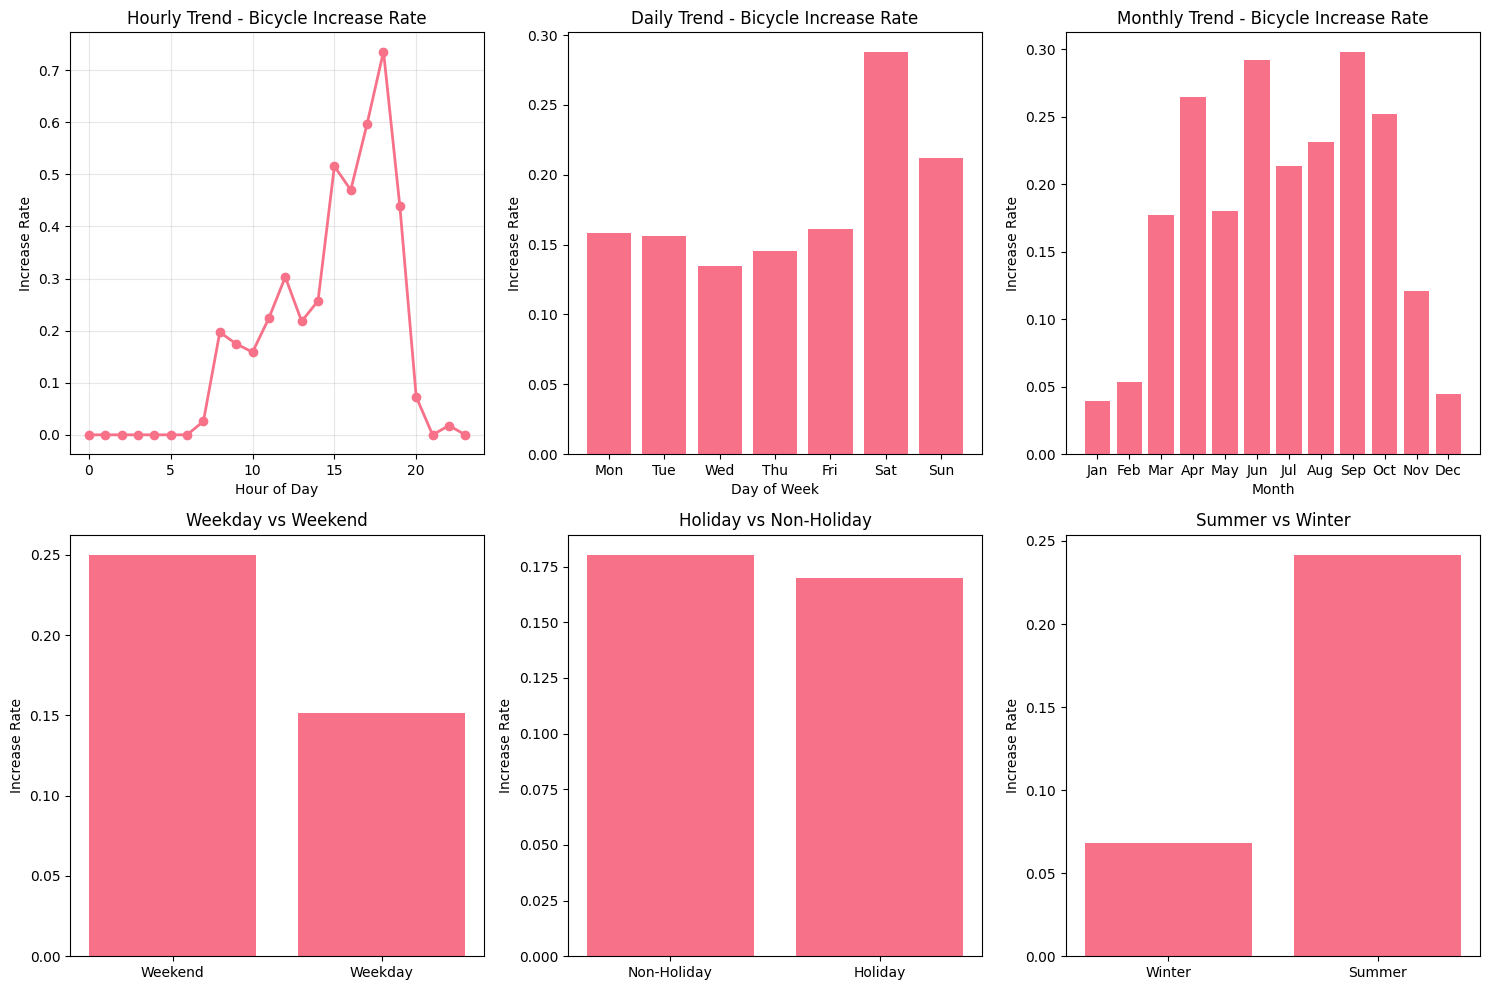


TIME-BASED INSIGHTS:
Peak hour: 18:00 (73.58% increase rate)
Best day: Sat (28.76% increase rate)
Best month: Sep (29.77% increase rate)
Weekday rate: 15.14% vs Weekend rate: 25.00%
Holiday rate: 16.98% vs Non-holiday: 18.03%
Summer rate: 24.17% vs Winter: 6.84%


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

# First, let's check what's actually in your increase_stock column
print("=== DATA CHECK ===")
print("Unique values in increase_stock:", df['increase_stock'].unique())
print("Data type of increase_stock:", df['increase_stock'].dtype)

# Convert increase_stock to numerical (1 for increase, 0 for no increase)
# Assuming 'low_bike_demand' means no increase needed, and other values might indicate increase
df['increase_stock_numeric'] = (df['increase_stock'] != 'low_bike_demand').astype(int)

print(f"Conversion: 'low_bike_demand' -> 0, other values -> 1")
print(f"New increase rate: {df['increase_stock_numeric'].mean():.2%}")
print(f"Total records: {len(df)}")
print()

# 1. TIME-BASED TRENDS ANALYSIS
print("=== TIME-BASED TRENDS ===")

plt.figure(figsize=(15, 10))

# Hourly trend
plt.subplot(2, 3, 1)
hourly_trend = df.groupby('hour_of_day')['increase_stock_numeric'].mean()
plt.plot(hourly_trend.index, hourly_trend.values, marker='o', linewidth=2)
plt.title('Hourly Trend - Bicycle Increase Rate')
plt.xlabel('Hour of Day')
plt.ylabel('Increase Rate')
plt.grid(True, alpha=0.3)

# Daily trend
plt.subplot(2, 3, 2)
daily_trend = df.groupby('day_of_week')['increase_stock_numeric'].mean()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.bar(daily_trend.index, daily_trend.values)
plt.title('Daily Trend - Bicycle Increase Rate')
plt.xlabel('Day of Week')
plt.ylabel('Increase Rate')
plt.xticks(daily_trend.index, days)

# Monthly trend
plt.subplot(2, 3, 3)
monthly_trend = df.groupby('month')['increase_stock_numeric'].mean()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(monthly_trend.index, monthly_trend.values)
plt.title('Monthly Trend - Bicycle Increase Rate')
plt.xlabel('Month')
plt.ylabel('Increase Rate')
plt.xticks(monthly_trend.index, months)

# Weekday vs Weekend
plt.subplot(2, 3, 4)
weekday_trend = df.groupby('weekday')['increase_stock_numeric'].mean()
plt.bar(['Weekend', 'Weekday'], weekday_trend.values)
plt.title('Weekday vs Weekend')
plt.ylabel('Increase Rate')

# Holiday analysis
plt.subplot(2, 3, 5)
holiday_trend = df.groupby('holiday')['increase_stock_numeric'].mean()
plt.bar(['Non-Holiday', 'Holiday'], holiday_trend.values)
plt.title('Holiday vs Non-Holiday')
plt.ylabel('Increase Rate')

# Summer time analysis
plt.subplot(2, 3, 6)
summer_trend = df.groupby('summertime')['increase_stock_numeric'].mean()
plt.bar(['Winter', 'Summer'], summer_trend.values)
plt.title('Summer vs Winter')
plt.ylabel('Increase Rate')

plt.tight_layout()
plt.show()

# Print time-based insights
print(f"\nTIME-BASED INSIGHTS:")
print(f"Peak hour: {hourly_trend.idxmax():02d}:00 ({hourly_trend.max():.2%} increase rate)")
print(f"Best day: {days[daily_trend.idxmax()]} ({daily_trend.max():.2%} increase rate)")
print(f"Best month: {months[monthly_trend.idxmax()-1]} ({monthly_trend.max():.2%} increase rate)")
print(f"Weekday rate: {weekday_trend[1]:.2%} vs Weekend rate: {weekday_trend[0]:.2%}")
print(f"Holiday rate: {holiday_trend[1]:.2%} vs Non-holiday: {holiday_trend[0]:.2%}")
print(f"Summer rate: {summer_trend[1]:.2%} vs Winter: {summer_trend[0]:.2%}")

### Weather-Based Trend Analysis


=== WEATHER-BASED TRENDS ===


/home/dinkey/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/dinkey/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


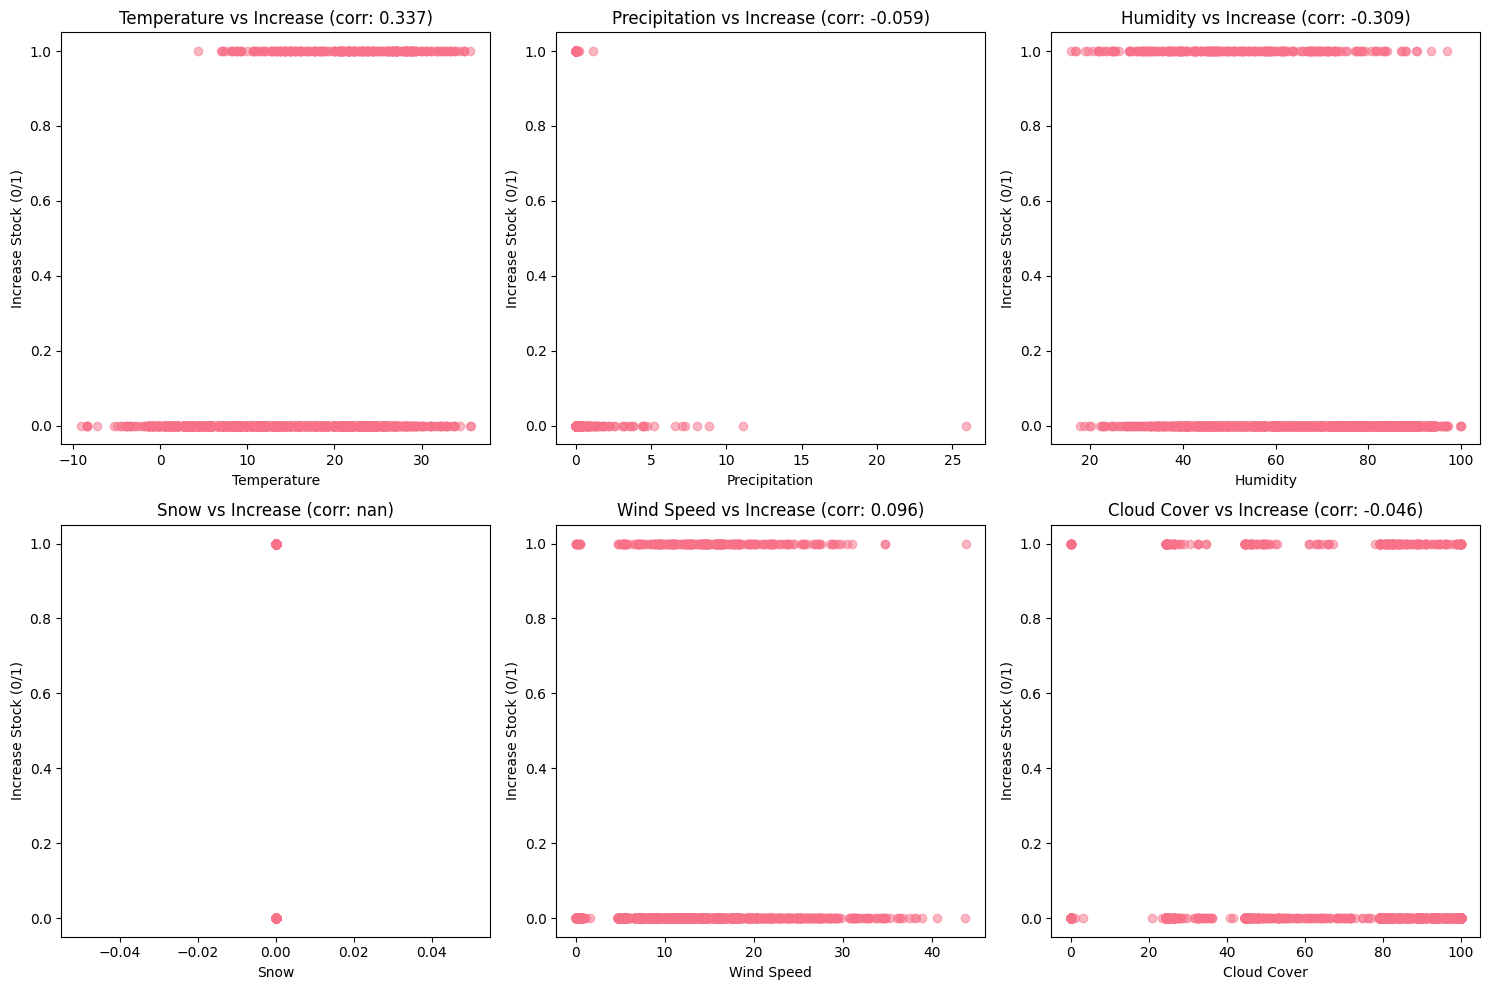


WEATHER CORRELATIONS:
temp        : +0.337
dew         : +0.133
humidity    : -0.309
precip      : -0.059
snow        : +nan
snowdepth   : -0.048
windspeed   : +0.096
cloudcover  : -0.046
visibility  : +0.113


In [5]:
# 2. WEATHER-BASED TRENDS
print("\n=== WEATHER-BASED TRENDS ===")

plt.figure(figsize=(15, 10))

# Temperature analysis
plt.subplot(2, 3, 1)
temp_corr = df['temp'].corr(df['increase_stock_numeric'])
plt.scatter(df['temp'], df['increase_stock_numeric'], alpha=0.5)
plt.title(f'Temperature vs Increase (corr: {temp_corr:.3f})')
plt.xlabel('Temperature')
plt.ylabel('Increase Stock (0/1)')

# Precipitation analysis
plt.subplot(2, 3, 2)
precip_corr = df['precip'].corr(df['increase_stock_numeric'])
plt.scatter(df['precip'], df['increase_stock_numeric'], alpha=0.5)
plt.title(f'Precipitation vs Increase (corr: {precip_corr:.3f})')
plt.xlabel('Precipitation')
plt.ylabel('Increase Stock (0/1)')

# Humidity analysis
plt.subplot(2, 3, 3)
humidity_corr = df['humidity'].corr(df['increase_stock_numeric'])
plt.scatter(df['humidity'], df['increase_stock_numeric'], alpha=0.5)
plt.title(f'Humidity vs Increase (corr: {humidity_corr:.3f})')
plt.xlabel('Humidity')
plt.ylabel('Increase Stock (0/1)')

# Snow analysis
plt.subplot(2, 3, 4)
snow_corr = df['snow'].corr(df['increase_stock_numeric'])
plt.scatter(df['snow'], df['increase_stock_numeric'], alpha=0.5)
plt.title(f'Snow vs Increase (corr: {snow_corr:.3f})')
plt.xlabel('Snow')
plt.ylabel('Increase Stock (0/1)')

# Wind speed analysis
plt.subplot(2, 3, 5)
wind_corr = df['windspeed'].corr(df['increase_stock_numeric'])
plt.scatter(df['windspeed'], df['increase_stock_numeric'], alpha=0.5)
plt.title(f'Wind Speed vs Increase (corr: {wind_corr:.3f})')
plt.xlabel('Wind Speed')
plt.ylabel('Increase Stock (0/1)')

# Cloud cover analysis
plt.subplot(2, 3, 6)
cloud_corr = df['cloudcover'].corr(df['increase_stock_numeric'])
plt.scatter(df['cloudcover'], df['increase_stock_numeric'], alpha=0.5)
plt.title(f'Cloud Cover vs Increase (corr: {cloud_corr:.3f})')
plt.xlabel('Cloud Cover')
plt.ylabel('Increase Stock (0/1)')

plt.tight_layout()
plt.show()

# Weather conditions summary
print(f"\nWEATHER CORRELATIONS:")
weather_features = ['temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']
for feature in weather_features:
    corr = df[feature].corr(df['increase_stock_numeric'])
    print(f"{feature:12}: {corr:+.3f}")


### Extreme Weather Analysis

In [6]:
# 3. EXTREME WEATHER ANALYSIS
print("\n=== EXTREME WEATHER ANALYSIS ===")

# Rainy vs Non-rainy days
rainy_days = df[df['precip'] > 0]
non_rainy_days = df[df['precip'] == 0]
print(f"Rainy days increase rate: {rainy_days['increase_stock_numeric'].mean():.2%} ({len(rainy_days)} records)")
print(f"Non-rainy days increase rate: {non_rainy_days['increase_stock_numeric'].mean():.2%} ({len(non_rainy_days)} records)")

# Snowy vs Non-snowy days
snowy_days = df[df['snow'] > 0]
non_snowy_days = df[df['snow'] == 0]
if len(snowy_days) > 0:
    print(f"Snowy days increase rate: {snowy_days['increase_stock_numeric'].mean():.2%} ({len(snowy_days)} records)")
    print(f"Non-snowy days increase rate: {non_snowy_days['increase_stock_numeric'].mean():.2%} ({len(non_snowy_days)} records)")

# Optimal temperature range (top 25% of increase rates)
high_demand = df[df['increase_stock_numeric'] == 1]
if len(high_demand) > 0:
    optimal_temp_range = (high_demand['temp'].quantile(0.25), high_demand['temp'].quantile(0.75))
    print(f"Optimal temperature range for high demand: {optimal_temp_range[0]:.1f}°C to {optimal_temp_range[1]:.1f}°C")


=== EXTREME WEATHER ANALYSIS ===
Rainy days increase rate: 5.16% (155 records)
Non-rainy days increase rate: 19.38% (1445 records)
Optimal temperature range for high demand: 16.3°C to 27.1°C


### Combined Analysis

In [7]:
# 4. COMBINED ANALYSIS
print("\n=== COMBINED INSIGHTS ===")

# Best overall conditions
best_conditions = df[
    (df['weekday'] == 1) &
    (df['summertime'] == 1) &
    (df['precip'] == 0) &
    (df['snow'] == 0)
]
if len(best_conditions) > 0:
    best_rate = best_conditions['increase_stock_numeric'].mean()
    print(f"Best conditions (summer weekday, no rain/snow): {best_rate:.2%} increase rate")

# Worst overall conditions
worst_conditions = df[
    (df['weekday'] == 0) &
    (df['summertime'] == 0) &
    ((df['precip'] > 0) | (df['snow'] > 0))
]
if len(worst_conditions) > 0:
    worst_rate = worst_conditions['increase_stock_numeric'].mean()
    print(f"Worst conditions (winter weekend, with rain/snow): {worst_rate:.2%} increase rate")

# Overall statistics
total_increase_rate = df['increase_stock_numeric'].mean()
print(f"\nOVERALL: {total_increase_rate:.2%} of time requires stock increase")
print(f"Total records analyzed: {len(df)}")


=== COMBINED INSIGHTS ===
Best conditions (summer weekday, no rain/snow): 22.10% increase rate
Worst conditions (winter weekend, with rain/snow): 8.33% increase rate

OVERALL: 18.00% of time requires stock increase
Total records analyzed: 1600


### More specific on Weekday, Weekend, and Holiday

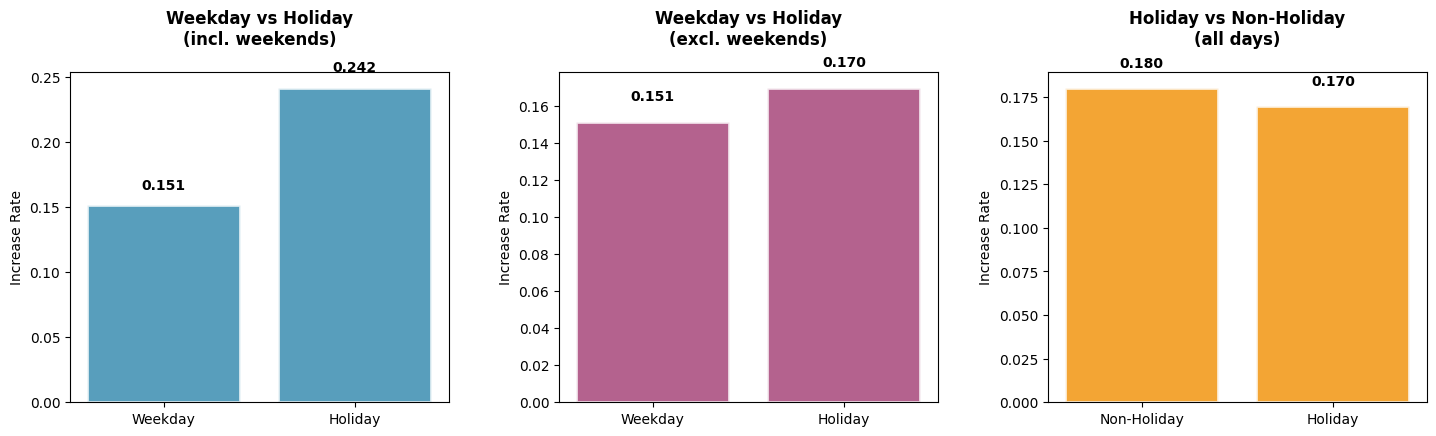

In [8]:
# Set a pleasing color palette
colors = ['#2E86AB', '#A23B72', '#F18F01']

# Create a figure with 3 side-by-side subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

categories_1 = ['Weekday', 'Holiday']
weekday = df[df['day_of_week'] < 5]['increase_stock_numeric'].mean()
df_hol = df[(df['holiday'] == 1) | (df['day_of_week'] >= 5)]
holiday = df_hol['increase_stock_numeric'].mean()
values = [weekday, holiday]
ax1.bar(categories_1, values,
        color=colors[0], alpha=0.8, edgecolor='white', linewidth=2)
ax1.set_title('Weekday vs Holiday\n(incl. weekends)', fontweight='bold', pad=20)
ax1.set_ylabel('Increase Rate')
# Add value labels on bars
for i, v in enumerate(values):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Weekday vs Holiday (excluding weekends)
df_hol = df[df['holiday'] == 1]
weekday = df[df['day_of_week'] < 5]['increase_stock_numeric'].mean()
holiday = df_hol['increase_stock_numeric'].mean()
values = [weekday, holiday]
categories_2 = ['Weekday', 'Holiday']
ax2.bar(categories_2, values,
        color=colors[1], alpha=0.8, edgecolor='white', linewidth=2)
ax2.set_title('Weekday vs Holiday\n(excl. weekends)', fontweight='bold', pad=20)
ax2.set_ylabel('Increase Rate')
for i, v in enumerate(values):
    ax2.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. Holiday vs Non-Holiday (all days)
no_hol = df[df['holiday'] == 0]['increase_stock_numeric'].mean()
values = [no_hol, holiday]
holiday_trend = df.groupby('holiday')['increase_stock_numeric'].mean()
categories_3 = ['Non-Holiday', 'Holiday']
ax3.bar(categories_3, values,
        color=colors[2], alpha=0.8, edgecolor='white', linewidth=2)
ax3.set_title('Holiday vs Non-Holiday\n(all days)', fontweight='bold', pad=20)
ax3.set_ylabel('Increase Rate')
for i, v in enumerate(values):
    ax3.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Adjust spacing and layout
plt.tight_layout(pad=3.0)
plt.show()

### Impact Analysis

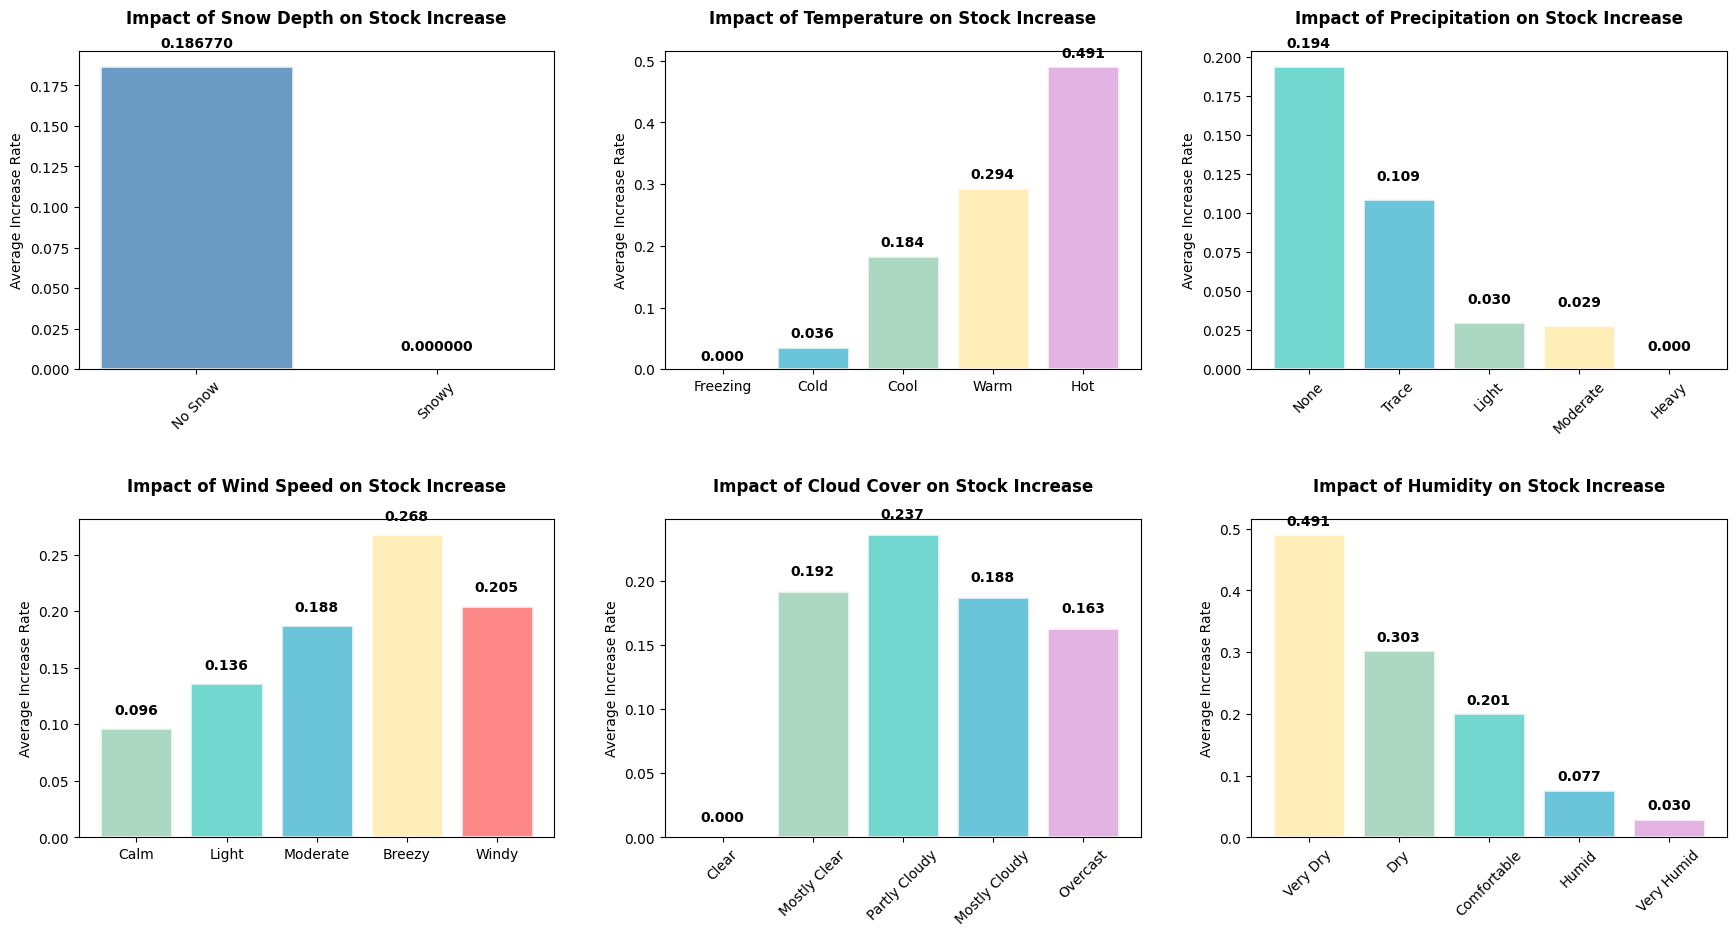

Snow category value counts:
snow_category
No Snow    1542
Snowy        19
Name: count, dtype: int64


In [9]:
import numpy as np

# Set a pleasing color palette for weather conditions
weather_colors = ['#2E86AB', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

# Create weather condition categories
df['weather_condition'] = 'Normal'
df.loc[df['precip'] > 0.5, 'weather_condition'] = 'Rainy'
df.loc[df['snow'] > 0, 'weather_condition'] = 'Snowy'
df.loc[df['windspeed'] > df['windspeed'].quantile(0.75), 'weather_condition'] = 'Windy'
df.loc[df['cloudcover'] > 70, 'weather_condition'] = 'Cloudy'
df.loc[(df['cloudcover'] < 30) & (df['precip'] == 0), 'weather_condition'] = 'Sunny'

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Snow depth impact - using appropriate categories for your data
# Create snow depth categories based on your data distribution
snow_bins = [-0.1, 0, 0.1]
snow_labels = ['No Snow', 'Snowy']

df['snow_category'] = pd.cut(df['snowdepth'], bins=snow_bins, labels=snow_labels)
snow_trend = df.groupby('snow_category', observed=True)['increase_stock_numeric'].mean()

# Filter out categories with no data
snow_trend = snow_trend.dropna()

# Use a cool color palette for snow
snow_colors = ['#4682B4', '#2E86AB']
axes[0,0].bar(snow_trend.index, snow_trend.values,
              color=snow_colors[:len(snow_trend)], alpha=0.8, edgecolor='white', linewidth=2)
axes[0,0].set_title('Impact of Snow Depth on Stock Increase', fontweight='bold', pad=20, fontsize=12)
axes[0,0].set_ylabel('Average Increase Rate')
axes[0,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(snow_trend.values):
    axes[0,0].text(i, v + 0.01, f'{v:.6f}', ha='center', va='bottom', fontweight='bold')

# 2. Temperature impact (binned)
df['temp_category'] = pd.cut(df['temp'], bins=[-np.inf, 0, 10, 20, 30, np.inf],
                            labels=['Freezing', 'Cold', 'Cool', 'Warm', 'Hot'])
temp_trend = df.groupby('temp_category', observed=True)['increase_stock_numeric'].mean()
axes[0,1].bar(temp_trend.index, temp_trend.values,
              color=weather_colors[1:len(temp_trend)+1], alpha=0.8, edgecolor='white', linewidth=2)
axes[0,1].set_title('Impact of Temperature on Stock Increase', fontweight='bold', pad=20, fontsize=12)
axes[0,1].set_ylabel('Average Increase Rate')
for i, v in enumerate(temp_trend.values):
    axes[0,1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. Precipitation impact
precip_bins = pd.cut(df['precip'], bins=[-0.1, 0, 0.1, 1, 5, np.inf],
                    labels=['None', 'Trace', 'Light', 'Moderate', 'Heavy'])
precip_trend = df.groupby(precip_bins, observed=True)['increase_stock_numeric'].mean()
axes[0,2].bar(precip_trend.index, precip_trend.values,
              color=['#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#FF6B6B'],
              alpha=0.8, edgecolor='white', linewidth=2)
axes[0,2].set_title('Impact of Precipitation on Stock Increase', fontweight='bold', pad=20, fontsize=12)
axes[0,2].set_ylabel('Average Increase Rate')
axes[0,2].tick_params(axis='x', rotation=45)
for i, v in enumerate(precip_trend.values):
    axes[0,2].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 4. Wind speed impact
wind_bins = pd.cut(df['windspeed'], bins=[0, 5, 10, 15, 20, np.inf],
                  labels=['Calm', 'Light', 'Moderate', 'Breezy', 'Windy'])
wind_trend = df.groupby(wind_bins, observed=True)['increase_stock_numeric'].mean()
axes[1,0].bar(wind_trend.index, wind_trend.values,
              color=['#96CEB4', '#4ECDC4', '#45B7D1', '#FFEAA7', '#FF6B6B'],
              alpha=0.8, edgecolor='white', linewidth=2)
axes[1,0].set_title('Impact of Wind Speed on Stock Increase', fontweight='bold', pad=20, fontsize=12)
axes[1,0].set_ylabel('Average Increase Rate')
for i, v in enumerate(wind_trend.values):
    axes[1,0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 5. Cloud cover impact
cloud_bins = pd.cut(df['cloudcover'], bins=[0, 20, 40, 60, 80, 100],
                   labels=['Clear', 'Mostly Clear', 'Partly Cloudy', 'Mostly Cloudy', 'Overcast'])
cloud_trend = df.groupby(cloud_bins, observed=True)['increase_stock_numeric'].mean()
axes[1,1].bar(cloud_trend.index, cloud_trend.values,
              color=['#FFEAA7', '#96CEB4', '#4ECDC4', '#45B7D1', '#DDA0DD'],
              alpha=0.8, edgecolor='white', linewidth=2)
axes[1,1].set_title('Impact of Cloud Cover on Stock Increase', fontweight='bold', pad=20, fontsize=12)
axes[1,1].set_ylabel('Average Increase Rate')
axes[1,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(cloud_trend.values):
    axes[1,1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 6. Humidity impact
humidity_bins = pd.cut(df['humidity'], bins=[0, 30, 50, 70, 90, 100],
                      labels=['Very Dry', 'Dry', 'Comfortable', 'Humid', 'Very Humid'])
humidity_trend = df.groupby(humidity_bins, observed=True)['increase_stock_numeric'].mean()
axes[1,2].bar(humidity_trend.index, humidity_trend.values,
              color=['#FFEAA7', '#96CEB4', '#4ECDC4', '#45B7D1', '#DDA0DD'],
              alpha=0.8, edgecolor='white', linewidth=2)
axes[1,2].set_title('Impact of Humidity on Stock Increase', fontweight='bold', pad=20, fontsize=12)
axes[1,2].set_ylabel('Average Increase Rate')
axes[1,2].tick_params(axis='x', rotation=45)
for i, v in enumerate(humidity_trend.values):
    axes[1,2].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout(pad=3.0)
plt.show()

# Let's also check what snow categories actually have data
print("Snow category value counts:")
print(df['snow_category'].value_counts())

# Feature Analysis

### Feature Correlation

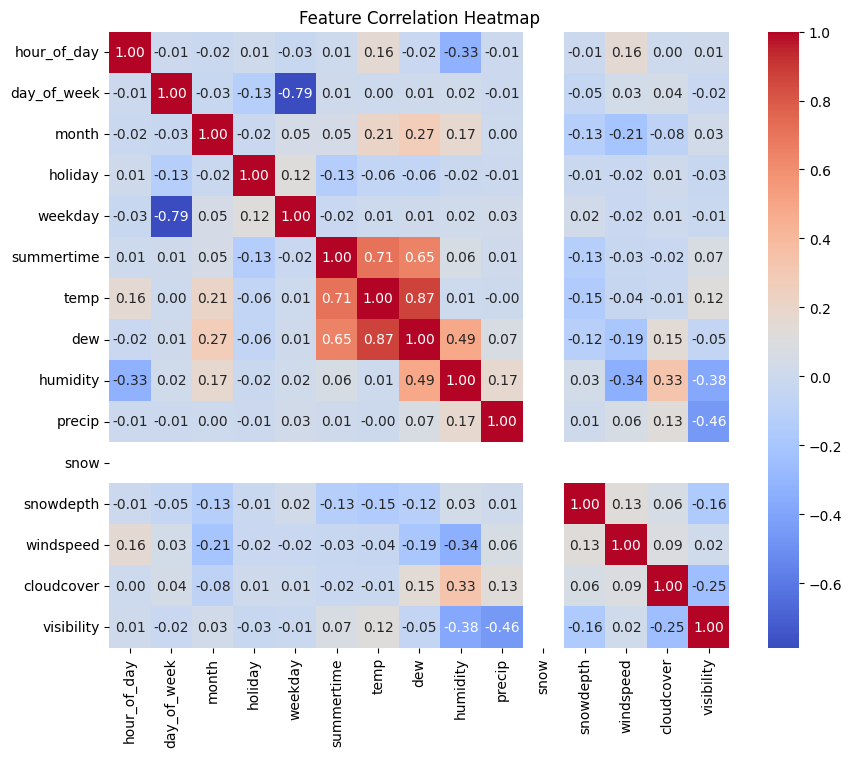

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/training_data_ht2025.csv")
corr = df.drop(columns=['increase_stock']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

### Feature Importance using LASSO Regression

In [11]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/training_data_ht2025.csv")

def prepare(df):
    df['increase_stock_numeric'] = (df['increase_stock'] != 'low_bike_demand').astype(int)
    y = df['increase_stock_numeric']
    X = df.drop(columns=['increase_stock', 'increase_stock_numeric'])

    # Standardize all features (important for fairness)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_val, y_train, y_val = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    return X_train, X_val, y_train, y_val

X_t, X_l, y_t, y_l = prepare(df)

# Fit LASSO with cross-validation to find optimal alpha
lasso = LassoCV(cv=5, random_state=42, max_iter=10000)
lasso.fit(X_t, y_t)

# Get coefficients and feature names
X = df.drop(columns=['increase_stock', 'increase_stock_numeric'])
coefficients = lasso.coef_
feature_names = X.columns

# Identify features with zero coefficients
unimportant_features = feature_names[coefficients == 0].tolist()
important_features = feature_names[coefficients != 0].tolist()

print("Important features (kept by LASSO):")
print(important_features)
print("\nUnimportant features (removed by LASSO):")
print(unimportant_features)

# Optional: Create new dataframe without unimportant features
df_reduced = df.drop(columns=unimportant_features)

# Print results summary
print(f"\nOriginal number of features: {len(feature_names)}")
print(f"Number of features kept: {len(important_features)}")
print(f"Number of features removed: {len(unimportant_features)}")
print(f"Optimal alpha found by LASSO: {lasso.alpha_:.6f}")

Important features (kept by LASSO):
['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'temp', 'dew', 'humidity', 'precip', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']

Unimportant features (removed by LASSO):
['snow']

Original number of features: 15
Number of features kept: 14
Number of features removed: 1
Optimal alpha found by LASSO: 0.000149


# Preprocessing

### Standard Preprocessing

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def preprocess(df):
    # 1. Convert the target to numeric: 1 = increase needed, 0 = low demand
    df['increase_stock_numeric'] = (df['increase_stock'] != 'low_bike_demand').astype(int)

    # 2. Define target
    y = df['increase_stock_numeric']

    # 3. Define features (drop targets and unimportant feature)
    X = df.drop(columns=['increase_stock', 'increase_stock_numeric', 'snow'])

    # 4. Standardize all features (important for fairness across models)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 5. Unified train/validation split (20%, same random_state for everyone)
    X_train, X_val, y_train, y_val = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    return X_train, X_val, y_train, y_val

df = pd.read_csv("data/training_data_ht2025.csv")

# Apply unified preprocessing
X_train, X_val, y_train, y_val = preprocess(df)

### Preprocessing with SMOTE (oversampling the minority class)

In [13]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

# def preprocess(df):
#     # 1. Convert the target to numeric: 1 = increase needed, 0 = low demand
#     df['increase_stock_numeric'] = (df['increase_stock'] != 'low_bike_demand').astype(int)

#     # 2. Define target
#     y = df['increase_stock_numeric']

#     # 3. Define features (drop targets and unimportant feature)
#     X = df.drop(columns=['increase_stock', 'increase_stock_numeric', 'snow'])

#     # 4. Oversampling Minority Class With SMOTE
#     smote = SMOTE()
#     X_sm, y_sm = smote.fit_resample(X, y)

#     # 5. Standardize all features (important for fairness across models)
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X_sm)

#     return X_scaled, y_sm

# df = pd.read_csv("data/training_data_ht2025.csv")

# # Apply unified preprocessing
# X, y = preprocess(df)

# # Now train your model using:
# # model.fit(X_train, y_train)
# # model.predict(X_val_fold)

# Baseline

This will be our baseline. All models tested in this project should be better than this baseline

Naive Model (Always 0) Accuracy: 0.84375

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       270
           1       0.00      0.00      0.00        50

    accuracy                           0.84       320
   macro avg       0.42      0.50      0.46       320
weighted avg       0.71      0.84      0.77       320


Confusion Matrix:


/home/dinkey/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/dinkey/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/dinkey/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


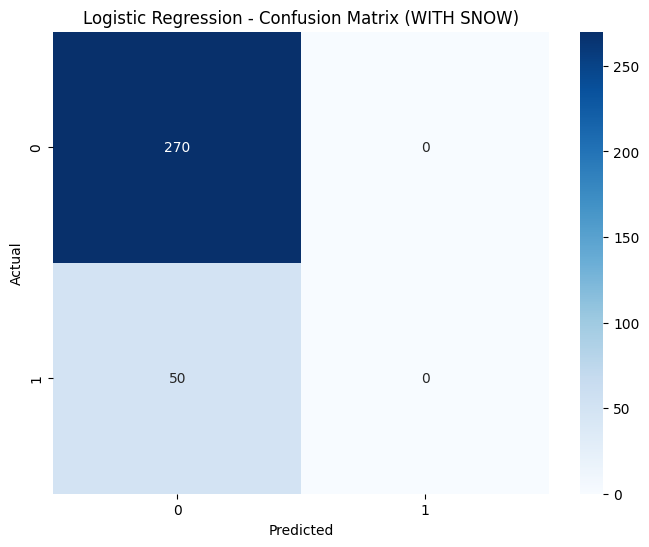

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Naive model: always predict low demand (0)
y_pred_naive = np.zeros_like(y_val)

print("Naive Model (Always 0) Accuracy:", accuracy_score(y_val, y_pred_naive))
print("\nClassification Report:")
print(classification_report(y_val, y_pred_naive))       
print("\nConfusion Matrix:")

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_pred_naive)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix (WITH SNOW)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Test Preparation [IMPORTANT TO RUN]

In [16]:
from sklearn.model_selection import StratifiedKFold

# define StratifiedKFold so every model will tested with same fold of data
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds = kf.split(X_train, y_train)

# Logistic Regression

### Basic Model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

log_reg = LogisticRegression()

eval_metrics = {'acc': [], 'prec': [], 'rec': [], 'f1': []}
fold = 1
# Stratified k-Fold cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    log_reg.fit(X_train_fold, y_train_fold)
    y_pred_fold = log_reg.predict(X_val_fold)

    eval_metrics['acc'].append(accuracy_score(y_val_fold, y_pred_fold))
    eval_metrics['prec'].append(precision_score(y_val_fold, y_pred_fold))
    eval_metrics['rec'].append(recall_score(y_val_fold, y_pred_fold))
    eval_metrics['f1'].append(f1_score(y_val_fold, y_pred_fold))

    print(f"Fold {fold} - Validation Accuracy: {accuracy_score(y_val_fold, y_pred_fold):.4f}")
    print(classification_report(y_val_fold, y_pred_fold))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_val_fold, y_pred_fold), "\n")

    fold += 1

print("-" * 70)
print("Performance Evaluation:")
print(f"Accuracy: {statistics.mean(eval_metrics['acc']):.4f}")
print(f"Precission: {statistics.mean(eval_metrics['prec']):.4f}")
print(f"Recall: {statistics.mean(eval_metrics['rec']):.4f}")
print(f"F1: {statistics.mean(eval_metrics['f1']):.4f}")

# store evalutation result for final report
log_reg_eval = {}
for key in eval_metrics:
  log_reg_eval[key] = statistics.mean(eval_metrics[key])

Fold 1 - Validation Accuracy: 0.8516
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       209
           1       0.71      0.32      0.44        47

    accuracy                           0.85       256
   macro avg       0.79      0.65      0.68       256
weighted avg       0.84      0.85      0.83       256

Confusion Matrix: 
[[203   6]
 [ 32  15]] 

Fold 2 - Validation Accuracy: 0.8320
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       209
           1       0.55      0.47      0.51        47

    accuracy                           0.83       256
   macro avg       0.72      0.69      0.70       256
weighted avg       0.82      0.83      0.83       256

Confusion Matrix: 
[[191  18]
 [ 25  22]] 

Fold 3 - Validation Accuracy: 0.8633
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       208
           1       0.68      0.52     

### Model Tuning

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],     # Regularization strength
    'penalty': ['l2'],                # L2 penalty (default, stable)
    'solver': ['lbfgs'],              # Stable for L2 penalty
    'max_iter': [500]                 # Enough iterations to converge
}

log_reg_search = GridSearchCV(
    LogisticRegression(),
    log_reg_params,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

log_reg_search.fit(X_train, y_train)

best_param = log_reg_search.best_params_
best_score = log_reg_search.best_score_
best_model = log_reg_search.best_estimator_

print(f'Best params: {best_param}')
print(f'Best Accuracy Score: {best_score}')

print('-' * 70)
print('Test the tuned model using k-fold cross validation:')

eval_metrics_tuned = {'acc': [], 'prec': [], 'rec': [], 'f1': []}
fold = 1
# Stratified k-Fold cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    best_model.fit(X_train_fold, y_train_fold)
    y_pred = best_model.predict(X_val_fold)

    eval_metrics_tuned['acc'].append(accuracy_score(y_val_fold, y_pred))
    eval_metrics_tuned['prec'].append(precision_score(y_val_fold, y_pred))
    eval_metrics_tuned['rec'].append(recall_score(y_val_fold, y_pred))
    eval_metrics_tuned['f1'].append(f1_score(y_val_fold, y_pred))

    print(f"Fold {fold} - Validation Accuracy: {accuracy_score(y_val_fold, y_pred):.4f}")
    print(classification_report(y_val_fold, y_pred))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_val_fold, y_pred), "\n")

    fold += 1

print("-" * 70)
print("Performance Evaluation: ")
print(f"Accuracy: {statistics.mean(eval_metrics_tuned['acc']):.4f}")
print(f"Precission: {statistics.mean(eval_metrics_tuned['prec']):.4f}")
print(f"Recall: {statistics.mean(eval_metrics_tuned['rec']):.4f}")
print(f"F1: {statistics.mean(eval_metrics_tuned['f1']):.4f}")

# store evalutation result for final report
log_reg_eval_tuned = {}
for key in eval_metrics_tuned:
  log_reg_eval_tuned[key] = statistics.mean(eval_metrics_tuned[key])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


Best params: {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Accuracy Score: 0.84921875
----------------------------------------------------------------------
Test the tuned model using k-fold cross validation:
Fold 1 - Validation Accuracy: 0.8594
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       209
           1       0.76      0.34      0.47        47

    accuracy                           0.86       256
   macro avg       0.81      0.66      0.69       256
weighted avg       0.85      0.86      0.84       256

Confusion Matrix: 
[[204   5]
 [ 31  16]] 

Fold 2 - Validation Accuracy: 0.8320
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       209
           1       0.55      0.47      0.51        47

    accuracy                           0.83       256
   macro avg       0.72      0.69      0.70       256
weighted avg       0.82      0.83      0.83       2

### Report

In [19]:
print("Base vs Tuning")
print(f"Base Accuracy: {statistics.mean(eval_metrics['acc']):.4f} | Tuned Accuracy: {statistics.mean(eval_metrics_tuned['acc']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['acc']) - statistics.mean(eval_metrics['acc'])):.4f}")
print(f"Base Precision: {statistics.mean(eval_metrics['prec']):.4f} | Tuned Precission: {statistics.mean(eval_metrics_tuned['prec']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['prec']) - statistics.mean(eval_metrics['prec'])):.4f}")
print(f"Base Recall: {statistics.mean(eval_metrics['rec']):.4f} | Tuned Recall: {statistics.mean(eval_metrics_tuned['rec']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['rec']) - statistics.mean(eval_metrics['rec'])):.4f}")
print(f"Base F1: {statistics.mean(eval_metrics['f1']):.4f} | Tuned F1: {statistics.mean(eval_metrics_tuned['f1']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['f1']) - statistics.mean(eval_metrics['f1'])):.4f}")

Base vs Tuning
Base Accuracy: 0.8453 | Tuned Accuracy: 0.8492 | Improvement: 0.0039
Base Precision: 0.6280 | Tuned Precission: 0.6457 | Improvement: 0.0177
Base Recall: 0.4366 | Tuned Recall: 0.4492 | Improvement: 0.0126
Base F1: 0.5094 | Tuned F1: 0.5238 | Improvement: 0.0144


# Discriminant Analysis

## Linear Discriminant Analysis

### Basic Model

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

lda = LinearDiscriminantAnalysis()

eval_metrics = {'acc': [], 'prec': [], 'rec': [], 'f1': []}
fold = 1
# Stratified k-Fold cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    lda.fit(X_train_fold, y_train_fold)
    y_pred = lda.predict(X_val_fold)

    eval_metrics['acc'].append(accuracy_score(y_val_fold, y_pred))
    eval_metrics['prec'].append(precision_score(y_val_fold, y_pred))
    eval_metrics['rec'].append(recall_score(y_val_fold, y_pred))
    eval_metrics['f1'].append(f1_score(y_val_fold, y_pred))

    print(f"Fold {fold} - Validation Accuracy: {accuracy_score(y_val_fold, y_pred):.4f}")
    print(classification_report(y_val_fold, y_pred))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_val_fold, y_pred), "\n")

    fold += 1

print("-" * 70)
print("Performance Evaluation:")
print(f"Accuracy: {statistics.mean(eval_metrics['acc']):.4f}")
print(f"Precission: {statistics.mean(eval_metrics['prec']):.4f}")
print(f"Recall: {statistics.mean(eval_metrics['rec']):.4f}")
print(f"F1: {statistics.mean(eval_metrics['f1']):.4f}")

# store evalutation result for final report
lda_eval = {}
for key in eval_metrics:
  lda_eval[key] = statistics.mean(eval_metrics[key])

Fold 1 - Validation Accuracy: 0.8594
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       209
           1       0.72      0.38      0.50        47

    accuracy                           0.86       256
   macro avg       0.80      0.67      0.71       256
weighted avg       0.85      0.86      0.84       256

Confusion Matrix: 
[[202   7]
 [ 29  18]] 

Fold 2 - Validation Accuracy: 0.8281
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       209
           1       0.54      0.43      0.48        47

    accuracy                           0.83       256
   macro avg       0.71      0.67      0.69       256
weighted avg       0.81      0.83      0.82       256

Confusion Matrix: 
[[192  17]
 [ 27  20]] 

Fold 3 - Validation Accuracy: 0.8672
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       208
           1       0.71      0.50     

### Model Tuning

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

lda_params = [
    {'solver': ['svd']},  # svd does not use shrinkage
    {'solver': ['lsqr', 'eigen'], 'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]}
]

grid_search = GridSearchCV(
    LinearDiscriminantAnalysis(),
    lda_params,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print(f'Best params: {best_param}')
print(f'Best Accuracy Score: {best_score}')

print('-' * 70)
print('Test the tuned model using k-fold cross validation:')

eval_metrics_tuned = {'acc': [], 'prec': [], 'rec': [], 'f1': []}
fold = 1
# Stratified k-Fold cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_val_fold)

    eval_metrics_tuned['acc'].append(accuracy_score(y_val_fold, y_pred))
    eval_metrics_tuned['prec'].append(precision_score(y_val_fold, y_pred))
    eval_metrics_tuned['rec'].append(recall_score(y_val_fold, y_pred))
    eval_metrics_tuned['f1'].append(f1_score(y_val_fold, y_pred))

    print(f"Fold {fold} - Validation Accuracy: {accuracy_score(y_val_fold, y_pred):.4f}")
    print(classification_report(y_val_fold, y_pred))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_val_fold, y_pred), "\n")

    fold += 1

print("-" * 70)
print("Performance Evaluation: ")
print(f"Accuracy: {statistics.mean(eval_metrics_tuned['acc']):.4f}")
print(f"Precission: {statistics.mean(eval_metrics_tuned['prec']):.4f}")
print(f"Recall: {statistics.mean(eval_metrics_tuned['rec']):.4f}")
print(f"F1: {statistics.mean(eval_metrics_tuned['f1']):.4f}")

# store evalutation result for final report
lda_eval_tuned = {}
for key in eval_metrics_tuned:
  lda_eval_tuned[key] = statistics.mean(eval_metrics_tuned[key])

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best params: {'solver': 'svd'}
Best Accuracy Score: 0.84375
----------------------------------------------------------------------
Test the tuned model using k-fold cross validation:
Fold 1 - Validation Accuracy: 0.8555
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       209
           1       0.69      0.38      0.49        47

    accuracy                           0.86       256
   macro avg       0.78      0.67      0.70       256
weighted avg       0.84      0.86      0.84       256

Confusion Matrix: 
[[201   8]
 [ 29  18]] 

Fold 2 - Validation Accuracy: 0.8281
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       209
           1       0.54      0.43      0.48        47

    accuracy                           0.83       256
   macro avg       0.71      0.67      0.69       256
weighted avg       0.81      0.83      

### Report

In [22]:
print("Base vs Tuning")
print(f"Base Accuracy: {statistics.mean(eval_metrics['acc']):.4f} | Tuned Accuracy: {statistics.mean(eval_metrics_tuned['acc']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['acc']) - statistics.mean(eval_metrics['acc'])):.4f}")
print(f"Base Precision: {statistics.mean(eval_metrics['prec']):.4f} | Tuned Precission: {statistics.mean(eval_metrics_tuned['prec']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['prec']) - statistics.mean(eval_metrics['prec'])):.4f}")
print(f"Base Recall: {statistics.mean(eval_metrics['rec']):.4f} | Tuned Recall: {statistics.mean(eval_metrics_tuned['rec']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['rec']) - statistics.mean(eval_metrics['rec'])):.4f}")
print(f"Base F1: {statistics.mean(eval_metrics['f1']):.4f} | Tuned F1: {statistics.mean(eval_metrics_tuned['f1']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['f1']) - statistics.mean(eval_metrics['f1'])):.4f}")

Base vs Tuning
Base Accuracy: 0.8438 | Tuned Accuracy: 0.8422 | Improvement: -0.0016
Base Precision: 0.6237 | Tuned Precission: 0.6217 | Improvement: -0.0020
Base Recall: 0.4200 | Tuned Recall: 0.4075 | Improvement: -0.0125
Base F1: 0.4998 | Tuned F1: 0.4906 | Improvement: -0.0092


## Quadratic Discriminant Analysis

### Basic Model

In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

qda = QuadraticDiscriminantAnalysis(reg_param=0.1)

eval_metrics = {'acc': [], 'prec': [], 'rec': [], 'f1': []}
fold = 1
# Stratified k-Fold cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_val_fold)

    eval_metrics['acc'].append(accuracy_score(y_val_fold, y_pred))
    eval_metrics['prec'].append(precision_score(y_val_fold, y_pred))
    eval_metrics['rec'].append(recall_score(y_val_fold, y_pred))
    eval_metrics['f1'].append(f1_score(y_val_fold, y_pred))

    print(f"Fold {fold} - Validation Accuracy: {accuracy_score(y_val_fold, y_pred):.4f}")
    print(classification_report(y_val_fold, y_pred))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_val_fold, y_pred), "\n")

    fold += 1

print("-" * 70)
print("Performance Evaluation:")
print(f"Accuracy: {statistics.mean(eval_metrics['acc']):.4f}")
print(f"Precission: {statistics.mean(eval_metrics['prec']):.4f}")
print(f"Recall: {statistics.mean(eval_metrics['rec']):.4f}")
print(f"F1: {statistics.mean(eval_metrics['f1']):.4f}")

# store evalutation result for final report
qda_eval = {}
for key in eval_metrics:
  qda_eval[key] = statistics.mean(eval_metrics[key])

Fold 1 - Validation Accuracy: 0.7344
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       209
           1       0.40      0.94      0.56        47

    accuracy                           0.73       256
   macro avg       0.69      0.81      0.69       256
weighted avg       0.87      0.73      0.76       256

Confusion Matrix: 
[[144  65]
 [  3  44]] 

Fold 2 - Validation Accuracy: 0.7148
              precision    recall  f1-score   support

           0       0.98      0.67      0.79       209
           1       0.39      0.94      0.55        47

    accuracy                           0.71       256
   macro avg       0.68      0.80      0.67       256
weighted avg       0.87      0.71      0.75       256

Confusion Matrix: 
[[139  70]
 [  3  44]] 

Fold 3 - Validation Accuracy: 0.7539
              precision    recall  f1-score   support

           0       0.99      0.71      0.82       208
           1       0.43      0.96     

### Model Tuning

In [24]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

qda_params = {'reg_param': [0, 0.01, 0.05, 0.1, 0.2, 0.5]}

grid_search = GridSearchCV(
    QuadraticDiscriminantAnalysis(),
    qda_params,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print(f'Best params: {best_param}')
print(f'Best Accuracy Score: {best_score}')

print('-' * 70)
print('Test the tuned model using k-fold cross validation:')

eval_metrics_tuned = {'acc': [], 'prec': [], 'rec': [], 'f1': []}
fold = 1
# Stratified k-Fold cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_val_fold)

    eval_metrics_tuned['acc'].append(accuracy_score(y_val_fold, y_pred))
    eval_metrics_tuned['prec'].append(precision_score(y_val_fold, y_pred))
    eval_metrics_tuned['rec'].append(recall_score(y_val_fold, y_pred))
    eval_metrics_tuned['f1'].append(f1_score(y_val_fold, y_pred))

    print(f"Fold {fold} - Validation Accuracy: {accuracy_score(y_val_fold, y_pred):.4f}")
    print(classification_report(y_val_fold, y_pred))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_val_fold, y_pred), "\n")

    fold += 1

print("-" * 70)
print("Performance Evaluation: ")
print(f"Accuracy: {statistics.mean(eval_metrics_tuned['acc']):.4f}")
print(f"Precission: {statistics.mean(eval_metrics_tuned['prec']):.4f}")
print(f"Recall: {statistics.mean(eval_metrics_tuned['rec']):.4f}")
print(f"F1: {statistics.mean(eval_metrics_tuned['f1']):.4f}")

# store evalutation result for final report
qda_eval_tuned = {}
for key in eval_metrics_tuned:
  qda_eval_tuned[key] = statistics.mean(eval_metrics_tuned[key])

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Best params: {'reg_param': 0.5}
Best Accuracy Score: 0.80390625
----------------------------------------------------------------------
Test the tuned model using k-fold cross validation:
Fold 1 - Validation Accuracy: 0.8281
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       209
           1       0.52      0.79      0.63        47

    accuracy                           0.83       256
   macro avg       0.73      0.81      0.76       256
weighted avg       0.87      0.83      0.84       256

Confusion Matrix: 
[[175  34]
 [ 10  37]] 

Fold 2 - Validation Accuracy: 0.8125
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       209
           1       0.49      0.83      0.62        47

    accuracy                           0.81       256
   macro avg       0.72      0.82      0.75       256
weighted avg       0.87      0.81      0.83       256

Confusion Matrix: 
[[169  40]
 [  8  39]]

/home/dinkey/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/dinkey/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/dinkey/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/dinkey/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearit

### Report

In [25]:
print("Base vs Tuning")
print(f"Base Accuracy: {statistics.mean(eval_metrics['acc']):.4f} | Tuned Accuracy: {statistics.mean(eval_metrics_tuned['acc']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['acc']) - statistics.mean(eval_metrics['acc'])):.4f}")
print(f"Base Precision: {statistics.mean(eval_metrics['prec']):.4f} | Tuned Precission: {statistics.mean(eval_metrics_tuned['prec']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['prec']) - statistics.mean(eval_metrics['prec'])):.4f}")
print(f"Base Recall: {statistics.mean(eval_metrics['rec']):.4f} | Tuned Recall: {statistics.mean(eval_metrics_tuned['rec']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['rec']) - statistics.mean(eval_metrics['rec'])):.4f}")
print(f"Base F1: {statistics.mean(eval_metrics['f1']):.4f} | Tuned F1: {statistics.mean(eval_metrics_tuned['f1']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['f1']) - statistics.mean(eval_metrics['f1'])):.4f}")

Base vs Tuning
Base Accuracy: 0.7344 | Tuned Accuracy: 0.8117 | Improvement: 0.0773
Base Precision: 0.4082 | Tuned Precission: 0.4971 | Improvement: 0.0889
Base Recall: 0.9495 | Tuned Recall: 0.8026 | Improvement: -0.1469
Base F1: 0.5708 | Tuned F1: 0.6135 | Improvement: 0.0427


# K-Neirest Neighbor

### Basic Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

knn = KNeighborsClassifier(n_neighbors=10)

eval_metrics = {'acc': [], 'prec': [], 'rec': [], 'f1': []}
fold = 1
# Stratified k-Fold cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    knn.fit(X_train_fold, y_train_fold)
    y_pred = knn.predict(X_val_fold)

    eval_metrics['acc'].append(accuracy_score(y_val_fold, y_pred))
    eval_metrics['prec'].append(precision_score(y_val_fold, y_pred))
    eval_metrics['rec'].append(recall_score(y_val_fold, y_pred))
    eval_metrics['f1'].append(f1_score(y_val_fold, y_pred))

    print(f"Fold {fold} - Validation Accuracy: {accuracy_score(y_val_fold, y_pred):.4f}")
    print(classification_report(y_val_fold, y_pred))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_val_fold, y_pred), "\n")

    fold += 1

print("-" * 70)
print("Performance Evaluation:")
print(f"Accuracy: {statistics.mean(eval_metrics['acc']):.4f}")
print(f"Precission: {statistics.mean(eval_metrics['prec']):.4f}")
print(f"Recall: {statistics.mean(eval_metrics['rec']):.4f}")
print(f"F1: {statistics.mean(eval_metrics['f1']):.4f}")

# store evalutation result for final report
knn_eval = {}
for key in eval_metrics:
  knn_eval[key] = statistics.mean(eval_metrics[key])

Fold 1 - Validation Accuracy: 0.8320
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       209
           1       0.60      0.26      0.36        47

    accuracy                           0.83       256
   macro avg       0.73      0.61      0.63       256
weighted avg       0.81      0.83      0.80       256

Confusion Matrix: 
[[201   8]
 [ 35  12]] 

Fold 2 - Validation Accuracy: 0.8516
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       209
           1       0.71      0.32      0.44        47

    accuracy                           0.85       256
   macro avg       0.79      0.65      0.68       256
weighted avg       0.84      0.85      0.83       256

Confusion Matrix: 
[[203   6]
 [ 32  15]] 

Fold 3 - Validation Accuracy: 0.8477
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       208
           1       0.66      0.40     

### Model Tuning

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

params = {'n_neighbors': list(range(1, 21)),
               'weights': ['uniform', 'distance'],
               'metric': ['euclidean', 'manhattan', 'minkowski']}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    params,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print(f'Best params: {best_param}')
print(f'Best Accuracy Score: {best_score}')

print('-' * 70)
print('Test the tuned model using k-fold cross validation:')

eval_metrics_tuned = {'acc': [], 'prec': [], 'rec': [], 'f1': []}
fold = 1
# Stratified k-Fold cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    best_model.fit(X_train_fold, y_train_fold)
    y_pred = best_model.predict(X_val_fold)

    eval_metrics_tuned['acc'].append(accuracy_score(y_val_fold, y_pred))
    eval_metrics_tuned['prec'].append(precision_score(y_val_fold, y_pred))
    eval_metrics_tuned['rec'].append(recall_score(y_val_fold, y_pred))
    eval_metrics_tuned['f1'].append(f1_score(y_val_fold, y_pred))

    print(f"Fold {fold} - Validation Accuracy: {accuracy_score(y_val_fold, y_pred):.4f}")
    print(classification_report(y_val_fold, y_pred))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_val_fold, y_pred), "\n")

    fold += 1

print("-" * 70)
print("Performance Evaluation: ")
print(f"Accuracy: {statistics.mean(eval_metrics_tuned['acc']):.4f}")
print(f"Precission: {statistics.mean(eval_metrics_tuned['prec']):.4f}")
print(f"Recall: {statistics.mean(eval_metrics_tuned['rec']):.4f}")
print(f"F1: {statistics.mean(eval_metrics_tuned['f1']):.4f}")

# store evalutation result for final report
knn_eval_tuned = {}
for key in eval_metrics_tuned:
  knn_eval_tuned[key] = statistics.mean(eval_metrics_tuned[key])

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best params: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
Best Accuracy Score: 0.875
----------------------------------------------------------------------
Test the tuned model using k-fold cross validation:
Fold 1 - Validation Accuracy: 0.8633
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       209
           1       0.69      0.47      0.56        47

    accuracy                           0.86       256
   macro avg       0.79      0.71      0.74       256
weighted avg       0.85      0.86      0.85       256

Confusion Matrix: 
[[199  10]
 [ 25  22]] 

Fold 2 - Validation Accuracy: 0.8711
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       209
           1       0.66      0.62      0.64        47

    accuracy                           0.87       256
   macro avg       0.79      0.77      0.78   

### Report

In [28]:
print("Base vs Tuning")
print(f"Base Accuracy: {statistics.mean(eval_metrics['acc']):.4f} | Tuned Accuracy: {statistics.mean(eval_metrics_tuned['acc']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['acc']) - statistics.mean(eval_metrics['acc'])):.4f}")
print(f"Base Precision: {statistics.mean(eval_metrics['prec']):.4f} | Tuned Precission: {statistics.mean(eval_metrics_tuned['prec']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['prec']) - statistics.mean(eval_metrics['prec'])):.4f}")
print(f"Base Recall: {statistics.mean(eval_metrics['rec']):.4f} | Tuned Recall: {statistics.mean(eval_metrics_tuned['rec']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['rec']) - statistics.mean(eval_metrics['rec'])):.4f}")
print(f"Base F1: {statistics.mean(eval_metrics['f1']):.4f} | Tuned F1: {statistics.mean(eval_metrics_tuned['f1']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['f1']) - statistics.mean(eval_metrics['f1'])):.4f}")

Base vs Tuning
Base Accuracy: 0.8492 | Tuned Accuracy: 0.8750 | Improvement: 0.0258
Base Precision: 0.6742 | Tuned Precission: 0.7059 | Improvement: 0.0317
Base Recall: 0.3607 | Tuned Recall: 0.5712 | Improvement: 0.2105
Base F1: 0.4676 | Tuned F1: 0.6285 | Improvement: 0.1609


# Tree-Based Model

## 1. Random Forest

### Basic Model

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest
    random_state=42,       # For reproducibility
    max_depth=5,           # Optional: controls tree depth to prevent overfitting
)

eval_metrics = {'acc': [], 'prec': [], 'rec': [], 'f1': []}
fold = 1
# Stratified k-Fold cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    rf_classifier.fit(X_train_fold, y_train_fold)
    y_pred = rf_classifier.predict(X_val_fold)

    eval_metrics['acc'].append(accuracy_score(y_val_fold, y_pred))
    eval_metrics['prec'].append(precision_score(y_val_fold, y_pred))
    eval_metrics['rec'].append(recall_score(y_val_fold, y_pred))
    eval_metrics['f1'].append(f1_score(y_val_fold, y_pred))

    print(f"Fold {fold} - Validation Accuracy: {accuracy_score(y_val_fold, y_pred):.4f}")
    print(classification_report(y_val_fold, y_pred))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_val_fold, y_pred), "\n")

    fold += 1

print("-" * 70)
print("Performance Evaluation:")
print(f"Accuracy: {statistics.mean(eval_metrics['acc']):.4f}")
print(f"Precission: {statistics.mean(eval_metrics['prec']):.4f}")
print(f"Recall: {statistics.mean(eval_metrics['rec']):.4f}")
print(f"F1: {statistics.mean(eval_metrics['f1']):.4f}")

# store evalutation result for final report
rf_eval = {}
for key in eval_metrics:
  rf_eval[key] = statistics.mean(eval_metrics[key])

Fold 1 - Validation Accuracy: 0.8672
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       209
           1       0.84      0.34      0.48        47

    accuracy                           0.87       256
   macro avg       0.86      0.66      0.70       256
weighted avg       0.86      0.87      0.84       256

Confusion Matrix: 
[[206   3]
 [ 31  16]] 

Fold 2 - Validation Accuracy: 0.8672
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       209
           1       0.74      0.43      0.54        47

    accuracy                           0.87       256
   macro avg       0.81      0.70      0.73       256
weighted avg       0.86      0.87      0.85       256

Confusion Matrix: 
[[202   7]
 [ 27  20]] 

Fold 3 - Validation Accuracy: 0.8477
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       208
           1       0.70      0.33     

### Model Tuning

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

params = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(
    RandomForestClassifier(),
    params,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print(f'Best params: {best_param}')
print(f'Best Accuracy Score: {best_score}')

print('-' * 70)
print('Test the tuned model using k-fold cross validation:')

eval_metrics_tuned = {'acc': [], 'prec': [], 'rec': [], 'f1': []}
fold = 1
# Stratified k-Fold cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    best_model.fit(X_train_fold, y_train_fold)
    y_pred = best_model.predict(X_val_fold)

    eval_metrics_tuned['acc'].append(accuracy_score(y_val_fold, y_pred))
    eval_metrics_tuned['prec'].append(precision_score(y_val_fold, y_pred))
    eval_metrics_tuned['rec'].append(recall_score(y_val_fold, y_pred))
    eval_metrics_tuned['f1'].append(f1_score(y_val_fold, y_pred))

    print(f"Fold {fold} - Validation Accuracy: {accuracy_score(y_val_fold, y_pred):.4f}")
    print(classification_report(y_val_fold, y_pred))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_val_fold, y_pred), "\n")

    fold += 1

print("-" * 70)
print("Performance Evaluation: ")
print(f"Accuracy: {statistics.mean(eval_metrics_tuned['acc']):.4f}")
print(f"Precission: {statistics.mean(eval_metrics_tuned['prec']):.4f}")
print(f"Recall: {statistics.mean(eval_metrics_tuned['rec']):.4f}")
print(f"F1: {statistics.mean(eval_metrics_tuned['f1']):.4f}")

# store evalutation result for final report
rf_eval_tuned = {}
for key in eval_metrics_tuned:
  rf_eval_tuned[key] = statistics.mean(eval_metrics_tuned[key])

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy Score: 0.915625
----------------------------------------------------------------------
Test the tuned model using k-fold cross validation:
Fold 1 - Validation Accuracy: 0.9141
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       209
           1       0.80      0.70      0.75        47

    accuracy                           0.91       256
   macro avg       0.87      0.83      0.85       256
weighted avg       0.91      0.91      0.91       256

Confusion Matrix: 
[[201   8]
 [ 14  33]] 

Fold 2 - Validation Accuracy: 0.9102
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       209
           1       0.73      0.81      0.77        47

    accuracy                           0.91       

### Report

In [31]:
print("Base vs Tuning")
print(f"Base Accuracy: {statistics.mean(eval_metrics['acc']):.4f} | Tuned Accuracy: {statistics.mean(eval_metrics_tuned['acc']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['acc']) - statistics.mean(eval_metrics['acc'])):.4f}")
print(f"Base Precision: {statistics.mean(eval_metrics['prec']):.4f} | Tuned Precission: {statistics.mean(eval_metrics_tuned['prec']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['prec']) - statistics.mean(eval_metrics['prec'])):.4f}")
print(f"Base Recall: {statistics.mean(eval_metrics['rec']):.4f} | Tuned Recall: {statistics.mean(eval_metrics_tuned['rec']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['rec']) - statistics.mean(eval_metrics['rec'])):.4f}")
print(f"Base F1: {statistics.mean(eval_metrics['f1']):.4f} | Tuned F1: {statistics.mean(eval_metrics_tuned['f1']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['f1']) - statistics.mean(eval_metrics['f1'])):.4f}")

Base vs Tuning
Base Accuracy: 0.8594 | Tuned Accuracy: 0.9117 | Improvement: 0.0523
Base Precision: 0.7542 | Tuned Precission: 0.7832 | Improvement: 0.0290
Base Recall: 0.3657 | Tuned Recall: 0.7313 | Improvement: 0.3656
Base F1: 0.4910 | Tuned F1: 0.7543 | Improvement: 0.2633


## 2. Classification Tree

### Basic Model

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# Create and train the Decision Tree classifier
tree_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,           # Limit tree depth to prevent overfitting
    min_samples_split=20,  # Minimum samples required to split a node
    min_samples_leaf=10,   # Minimum samples required at a leaf node
)

eval_metrics = {'acc': [], 'prec': [], 'rec': [], 'f1': []}
fold = 1
# Stratified k-Fold cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    tree_classifier.fit(X_train, y_train)
    y_pred = tree_classifier.predict(X_val_fold)

    eval_metrics['acc'].append(accuracy_score(y_val_fold, y_pred))
    eval_metrics['prec'].append(precision_score(y_val_fold, y_pred))
    eval_metrics['rec'].append(recall_score(y_val_fold, y_pred))
    eval_metrics['f1'].append(f1_score(y_val_fold, y_pred))

    print(f"Fold {fold} - Validation Accuracy: {accuracy_score(y_val_fold, y_pred):.4f}")
    print(classification_report(y_val_fold, y_pred))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_val_fold, y_pred), "\n")

    fold += 1

print("-" * 70)
print("Performance Evaluation:")
print(f"Accuracy: {statistics.mean(eval_metrics['acc']):.4f}")
print(f"Precission: {statistics.mean(eval_metrics['prec']):.4f}")
print(f"Recall: {statistics.mean(eval_metrics['rec']):.4f}")
print(f"F1: {statistics.mean(eval_metrics['f1']):.4f}")

# store evalutation result for final report
tree_eval = {}
for key in eval_metrics:
  tree_eval[key] = statistics.mean(eval_metrics[key])

Fold 1 - Validation Accuracy: 0.9180
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       209
           1       0.82      0.70      0.76        47

    accuracy                           0.92       256
   macro avg       0.88      0.83      0.85       256
weighted avg       0.91      0.92      0.92       256

Confusion Matrix: 
[[202   7]
 [ 14  33]] 

Fold 2 - Validation Accuracy: 0.9023
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       209
           1       0.72      0.77      0.74        47

    accuracy                           0.90       256
   macro avg       0.83      0.85      0.84       256
weighted avg       0.90      0.90      0.90       256

Confusion Matrix: 
[[195  14]
 [ 11  36]] 

Fold 3 - Validation Accuracy: 0.9102
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       208
           1       0.78      0.73     

### Model Tuning

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

params = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(),
    params,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print(f'Best params: {best_param}')
print(f'Best Accuracy Score: {best_score}')

print('-' * 70)
print('Test the tuned model using k-fold cross validation:')

eval_metrics_tuned = {'acc': [], 'prec': [], 'rec': [], 'f1': []}
fold = 1
# Stratified k-Fold cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_val_fold)

    eval_metrics_tuned['acc'].append(accuracy_score(y_val_fold, y_pred))
    eval_metrics_tuned['prec'].append(precision_score(y_val_fold, y_pred))
    eval_metrics_tuned['rec'].append(recall_score(y_val_fold, y_pred))
    eval_metrics_tuned['f1'].append(f1_score(y_val_fold, y_pred))

    print(f"Fold {fold} - Validation Accuracy: {accuracy_score(y_val_fold, y_pred):.4f}")
    print(classification_report(y_val_fold, y_pred))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_val_fold, y_pred), "\n")

    fold += 1

print("-" * 70)
print("Performance Evaluation: ")
print(f"Accuracy: {statistics.mean(eval_metrics_tuned['acc']):.4f}")
print(f"Precission: {statistics.mean(eval_metrics_tuned['prec']):.4f}")
print(f"Recall: {statistics.mean(eval_metrics_tuned['rec']):.4f}")
print(f"F1: {statistics.mean(eval_metrics_tuned['f1']):.4f}")

# store evalutation result for final report
tree_eval_tuned = {}
for key in eval_metrics_tuned:
  tree_eval_tuned[key] = statistics.mean(eval_metrics_tuned[key])

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best params: {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Accuracy Score: 0.90546875
----------------------------------------------------------------------
Test the tuned model using k-fold cross validation:
Fold 1 - Validation Accuracy: 0.9219
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       209
           1       0.83      0.72      0.77        47

    accuracy                           0.92       256
   macro avg       0.88      0.84      0.86       256
weighted avg       0.92      0.92      0.92       256

Confusion Matrix: 
[[202   7]
 [ 13  34]] 

Fold 2 - Validation Accuracy: 0.9297
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       209
           1       0.78      0.85      0.82        47

    accuracy                           0.93     

### Report

In [34]:
print("Base vs Tuning")
print(f"Base Accuracy: {statistics.mean(eval_metrics['acc']):.4f} | Tuned Accuracy: {statistics.mean(eval_metrics_tuned['acc']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['acc']) - statistics.mean(eval_metrics['acc'])):.4f}")
print(f"Base Precision: {statistics.mean(eval_metrics['prec']):.4f} | Tuned Precission: {statistics.mean(eval_metrics_tuned['prec']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['prec']) - statistics.mean(eval_metrics['prec'])):.4f}")
print(f"Base Recall: {statistics.mean(eval_metrics['rec']):.4f} | Tuned Recall: {statistics.mean(eval_metrics_tuned['rec']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['rec']) - statistics.mean(eval_metrics['rec'])):.4f}")
print(f"Base F1: {statistics.mean(eval_metrics['f1']):.4f} | Tuned F1: {statistics.mean(eval_metrics_tuned['f1']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['f1']) - statistics.mean(eval_metrics['f1'])):.4f}")

Base vs Tuning
Base Accuracy: 0.9070 | Tuned Accuracy: 0.9195 | Improvement: 0.0125
Base Precision: 0.7635 | Tuned Precission: 0.8082 | Improvement: 0.0447
Base Recall: 0.7353 | Tuned Recall: 0.7482 | Improvement: 0.0129
Base F1: 0.7469 | Tuned F1: 0.7753 | Improvement: 0.0284


## 3. Bagging

### Basic Model

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# Create and train the Bagging classifier
bagging_classifier = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=10,           # Let's give each tree some depth
        min_samples_split=20,
        random_state=42
    ),
    n_estimators=100,           # Number of base estimators (trees)
    max_samples=0.8,            # Use 80% of samples for each tree
    max_features=0.8,           # Use 80% of features for each tree
    random_state=42,
    n_jobs=-1                   # Use all available processors
)

eval_metrics = {'acc': [], 'prec': [], 'rec': [], 'f1': []}
fold = 1
# Stratified k-Fold cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    bagging_classifier.fit(X_train_fold, y_train_fold)
    y_pred = bagging_classifier.predict(X_val_fold)

    eval_metrics['acc'].append(accuracy_score(y_val_fold, y_pred))
    eval_metrics['prec'].append(precision_score(y_val_fold, y_pred))
    eval_metrics['rec'].append(recall_score(y_val_fold, y_pred))
    eval_metrics['f1'].append(f1_score(y_val_fold, y_pred))

    print(f"Fold {fold} - Validation Accuracy: {accuracy_score(y_val_fold, y_pred):.4f}")
    print(classification_report(y_val_fold, y_pred))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_val_fold, y_pred), "\n")

    fold += 1

print("-" * 70)
print("Performance Evaluation:")
print(f"Accuracy: {statistics.mean(eval_metrics['acc']):.4f}")
print(f"Precission: {statistics.mean(eval_metrics['prec']):.4f}")
print(f"Recall: {statistics.mean(eval_metrics['rec']):.4f}")
print(f"F1: {statistics.mean(eval_metrics['f1']):.4f}")

# store evalutation result for final report
bg_eval = {}
for key in eval_metrics:
  bg_eval[key] = statistics.mean(eval_metrics[key])

Fold 1 - Validation Accuracy: 0.9141
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       209
           1       0.86      0.64      0.73        47

    accuracy                           0.91       256
   macro avg       0.89      0.81      0.84       256
weighted avg       0.91      0.91      0.91       256

Confusion Matrix: 
[[204   5]
 [ 17  30]] 

Fold 2 - Validation Accuracy: 0.9141
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       209
           1       0.78      0.74      0.76        47

    accuracy                           0.91       256
   macro avg       0.86      0.85      0.85       256
weighted avg       0.91      0.91      0.91       256

Confusion Matrix: 
[[199  10]
 [ 12  35]] 

Fold 3 - Validation Accuracy: 0.8984
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       208
           1       0.87      0.54     

### Model Tuning

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

params = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_features': [0.6, 0.7, 0.8, 0.9, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

grid_search = GridSearchCV(
    BaggingClassifier(),
    params,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print(f'Best params: {best_param}')
print(f'Best Accuracy Score: {best_score}')

print('-' * 70)
print('Test the tuned model using k-fold cross validation:')

eval_metrics_tuned = {'acc': [], 'prec': [], 'rec': [], 'f1': []}
fold = 1
# Stratified k-Fold cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    best_model.fit(X_train_fold, y_train_fold)
    y_pred = best_model.predict(X_val_fold)

    eval_metrics_tuned['acc'].append(accuracy_score(y_val_fold, y_pred))
    eval_metrics_tuned['prec'].append(precision_score(y_val_fold, y_pred))
    eval_metrics_tuned['rec'].append(recall_score(y_val_fold, y_pred))
    eval_metrics_tuned['f1'].append(f1_score(y_val_fold, y_pred))

    print(f"Fold {fold} - Validation Accuracy: {accuracy_score(y_val_fold, y_pred):.4f}")
    print(classification_report(y_val_fold, y_pred))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_val_fold, y_pred), "\n")

    fold += 1

print("-" * 70)
print("Performance Evaluation: ")
print(f"Accuracy: {statistics.mean(eval_metrics_tuned['acc']):.4f}")
print(f"Precission: {statistics.mean(eval_metrics_tuned['prec']):.4f}")
print(f"Recall: {statistics.mean(eval_metrics_tuned['rec']):.4f}")
print(f"F1: {statistics.mean(eval_metrics_tuned['f1']):.4f}")

# store evalutation result for final report
bg_eval_tuned = {}
for key in eval_metrics_tuned:
  bg_eval_tuned[key] = statistics.mean(eval_metrics_tuned[key])

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best params: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.8, 'max_samples': 0.7, 'n_estimators': 150}
Best Accuracy Score: 0.91328125
----------------------------------------------------------------------
Test the tuned model using k-fold cross validation:
Fold 1 - Validation Accuracy: 0.9102
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       209
           1       0.88      0.60      0.71        47

    accuracy                           0.91       256
   macro avg       0.90      0.79      0.83       256
weighted avg       0.91      0.91      0.90       256

Confusion Matrix: 
[[205   4]
 [ 19  28]] 

Fold 2 - Validation Accuracy: 0.9141
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       209
           1       0.77      0.77      0.77        47

    accuracy                           0.91     

### Report

In [37]:
print("Base vs Tuning")
print(f"Base Accuracy: {statistics.mean(eval_metrics['acc']):.4f} | Tuned Accuracy: {statistics.mean(eval_metrics_tuned['acc']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['acc']) - statistics.mean(eval_metrics['acc'])):.4f}")
print(f"Base Precision: {statistics.mean(eval_metrics['prec']):.4f} | Tuned Precission: {statistics.mean(eval_metrics_tuned['prec']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['prec']) - statistics.mean(eval_metrics['prec'])):.4f}")
print(f"Base Recall: {statistics.mean(eval_metrics['rec']):.4f} | Tuned Recall: {statistics.mean(eval_metrics_tuned['rec']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['rec']) - statistics.mean(eval_metrics['rec'])):.4f}")
print(f"Base F1: {statistics.mean(eval_metrics['f1']):.4f} | Tuned F1: {statistics.mean(eval_metrics_tuned['f1']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['f1']) - statistics.mean(eval_metrics['f1'])):.4f}")

Base vs Tuning
Base Accuracy: 0.9094 | Tuned Accuracy: 0.9109 | Improvement: 0.0016
Base Precision: 0.8253 | Tuned Precission: 0.8310 | Improvement: 0.0057
Base Recall: 0.6558 | Tuned Recall: 0.6598 | Improvement: 0.0041
Base F1: 0.7273 | Tuned F1: 0.7310 | Improvement: 0.0037


# Boosting

### Basic Model

In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

xgb_classifier = XGBClassifier()

eval_metrics = {'acc': [], 'prec': [], 'rec': [], 'f1': []}
fold = 1
# Stratified k-Fold cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    xgb_classifier.fit(X_train, y_train)
    y_pred = xgb_classifier.predict(X_val_fold)

    eval_metrics['acc'].append(accuracy_score(y_val_fold, y_pred))
    eval_metrics['prec'].append(precision_score(y_val_fold, y_pred))
    eval_metrics['rec'].append(recall_score(y_val_fold, y_pred))
    eval_metrics['f1'].append(f1_score(y_val_fold, y_pred))

    print(f"Fold {fold} - Validation Accuracy: {accuracy_score(y_val_fold, y_pred):.4f}")
    print(classification_report(y_val_fold, y_pred))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_val_fold, y_pred), "\n")

    fold += 1

print("-" * 70)
print("Performance Evaluation:")
print(f"Accuracy: {statistics.mean(eval_metrics['acc']):.4f}")
print(f"Precission: {statistics.mean(eval_metrics['prec']):.4f}")
print(f"Recall: {statistics.mean(eval_metrics['rec']):.4f}")
print(f"F1: {statistics.mean(eval_metrics['f1']):.4f}")

# store evalutation result for final report
xgb_eval = {}
for key in eval_metrics:
  xgb_eval[key] = statistics.mean(eval_metrics[key])

Fold 1 - Validation Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00        47

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256

Confusion Matrix: 
[[209   0]
 [  0  47]] 

Fold 2 - Validation Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00        47

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256

Confusion Matrix: 
[[209   0]
 [  0  47]] 

Fold 3 - Validation Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00     

### Model Tuning

In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

params = {
    'objective': ['binary:logistic'],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9]
}

grid_search = GridSearchCV(
    XGBClassifier(),
    params,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print(f'Best params: {best_param}')
print(f'Best Accuracy Score: {best_score}')

print('-' * 70)
print('Test the tuned model using k-fold cross validation:')

eval_metrics_tuned = {'acc': [], 'prec': [], 'rec': [], 'f1': []}
fold = 1
# Stratified k-Fold cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_val_fold)

    eval_metrics_tuned['acc'].append(accuracy_score(y_val_fold, y_pred))
    eval_metrics_tuned['prec'].append(precision_score(y_val_fold, y_pred))
    eval_metrics_tuned['rec'].append(recall_score(y_val_fold, y_pred))
    eval_metrics_tuned['f1'].append(f1_score(y_val_fold, y_pred))

    print(f"Fold {fold} - Validation Accuracy: {accuracy_score(y_val_fold, y_pred):.4f}")
    print(classification_report(y_val_fold, y_pred))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_val_fold, y_pred), "\n")

    fold += 1

print("-" * 70)
print("Performance Evaluation: ")
print(f"Accuracy: {statistics.mean(eval_metrics_tuned['acc']):.4f}")
print(f"Precission: {statistics.mean(eval_metrics_tuned['prec']):.4f}")
print(f"Recall: {statistics.mean(eval_metrics_tuned['rec']):.4f}")
print(f"F1: {statistics.mean(eval_metrics_tuned['f1']):.4f}")

# store evalutation result for final report
xgb_eval_tuned = {}
for key in eval_metrics_tuned:
  xgb_eval_tuned[key] = statistics.mean(eval_metrics_tuned[key])

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'objective': 'binary:logistic'}
Best Accuracy Score: 0.9125
----------------------------------------------------------------------
Test the tuned model using k-fold cross validation:
Fold 1 - Validation Accuracy: 0.9180
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       209
           1       0.88      0.64      0.74        47

    accuracy                           0.92       256
   macro avg       0.90      0.81      0.85       256
weighted avg       0.92      0.92      0.91       256

Confusion Matrix: 
[[205   4]
 [ 17  30]] 

Fold 2 - Validation Accuracy: 0.9336
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       209
           1       0.81      0.83      0.82        47

    accuracy                           0.93       256
   macro avg       0

### Report

In [40]:
print("Base vs Tuning")
print(f"Base Accuracy: {statistics.mean(eval_metrics['acc']):.4f} | Tuned Accuracy: {statistics.mean(eval_metrics_tuned['acc']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['acc']) - statistics.mean(eval_metrics['acc'])):.4f}")
print(f"Base Precision: {statistics.mean(eval_metrics['prec']):.4f} | Tuned Precission: {statistics.mean(eval_metrics_tuned['prec']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['prec']) - statistics.mean(eval_metrics['prec'])):.4f}")
print(f"Base Recall: {statistics.mean(eval_metrics['rec']):.4f} | Tuned Recall: {statistics.mean(eval_metrics_tuned['rec']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['rec']) - statistics.mean(eval_metrics['rec'])):.4f}")
print(f"Base F1: {statistics.mean(eval_metrics['f1']):.4f} | Tuned F1: {statistics.mean(eval_metrics_tuned['f1']):.4f} | Improvement: {(statistics.mean(eval_metrics_tuned['f1']) - statistics.mean(eval_metrics['f1'])):.4f}")

Base vs Tuning
Base Accuracy: 1.0000 | Tuned Accuracy: 0.9234 | Improvement: -0.0766
Base Precision: 1.0000 | Tuned Precission: 0.8361 | Improvement: -0.1639
Base Recall: 1.0000 | Tuned Recall: 0.7353 | Improvement: -0.2647
Base F1: 1.0000 | Tuned F1: 0.7798 | Improvement: -0.2202


# Performance Report

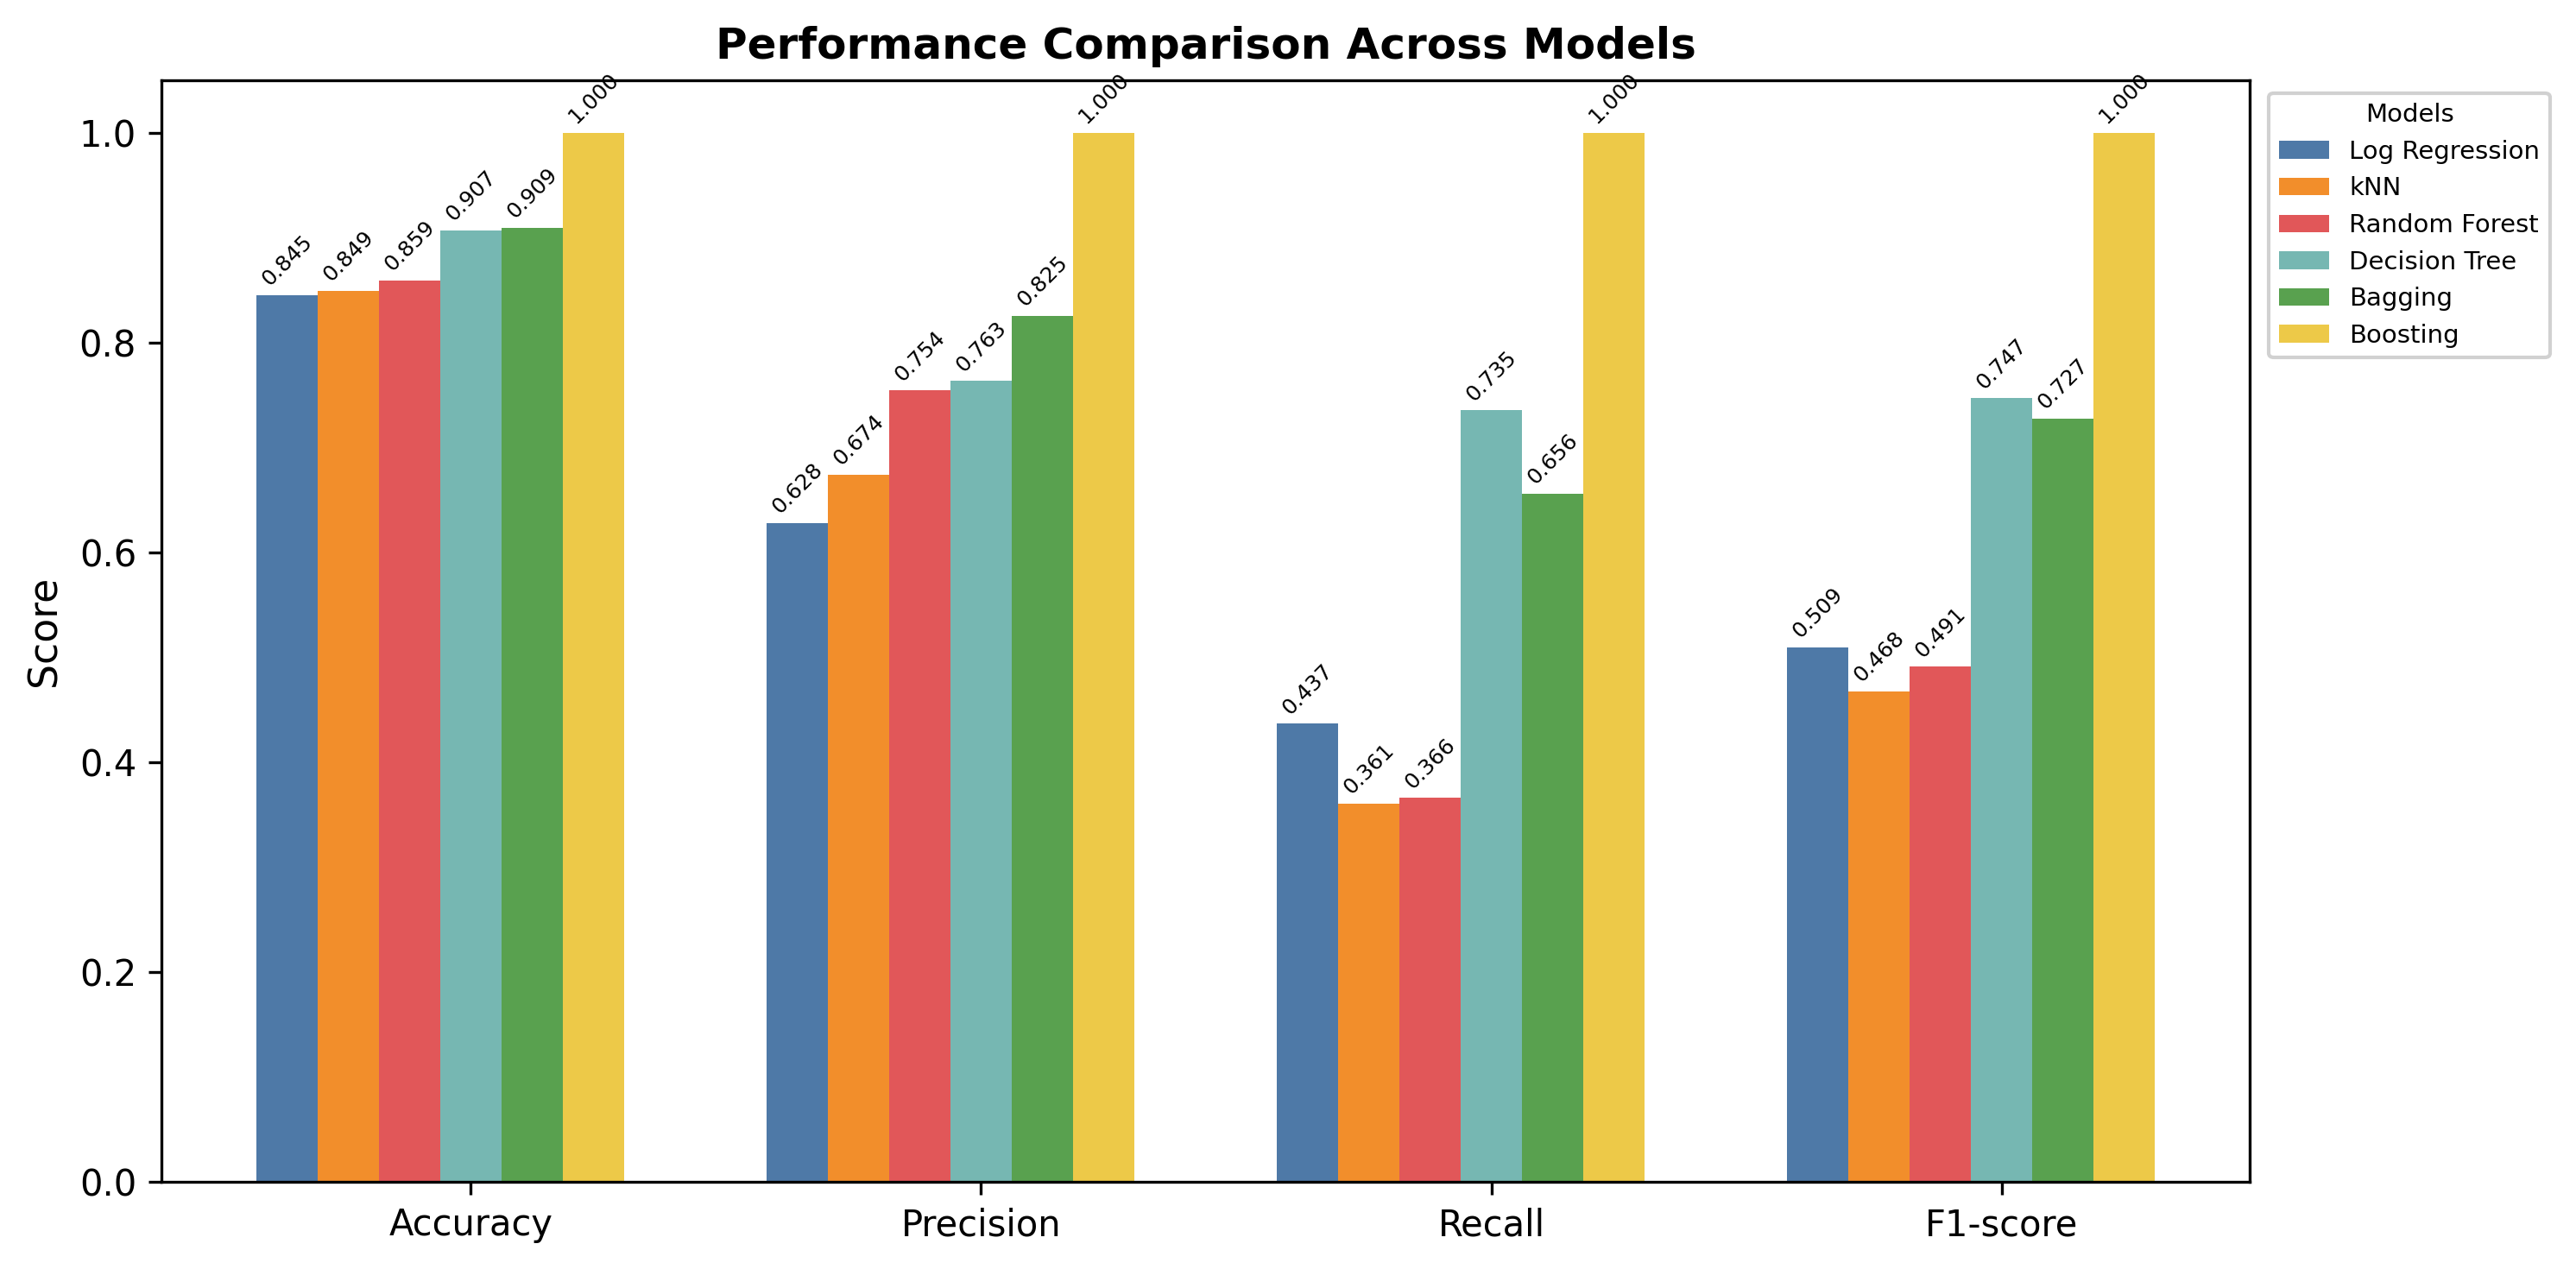

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def generate_chart(res, title):
  metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
  metric_keys = ["acc", "prec", "rec", "f1"]
  model_labels = ["Log Regression", "kNN", "Random Forest", "Decision Tree", "Bagging", "Boosting"]

  colors = [
    "#4E79A7",  # blue
    "#F28E2B",  # orange
    "#E15759",  # red
    "#76B7B2",  # teal
    "#59A14F",  # green
    "#EDC948"   # yellow
  ]

  # Convert dict -> matrix (6 models × 4 metrics)
  data = np.array([[d[m] for m in metric_keys] for d in res])

  x = np.arange(len(metrics))
  width = 0.12

  plt.figure(figsize=(10, 5), dpi=300)

  # --- Plot ---
  for i in range(len(res)):
      bars = plt.bar(x + i*width, data[i], width, label=model_labels[i], color=colors[i])

      # Add value labels above bars
      for bar in bars:
          height = bar.get_height()
          plt.text(
              bar.get_x() + bar.get_width()/2,
              height + 0.005,
              f"{height:.3f}",
              ha="center",
              va="bottom",
              fontsize=6,
              rotation=45
          )

  # Axis & labels
  plt.xticks(x + width*3, metrics, fontsize=10)
  plt.ylabel("Score", fontsize=11)
  plt.ylim(0, 1.05)

  # Scientific title & style
  plt.title(title, fontsize=12, fontweight="bold")

  # Legend in top-right with scientific look
  plt.legend(
      title="Models",
      loc="upper right",
      bbox_to_anchor=(1.15, 1),
      fontsize=7,
      title_fontsize=7,
      frameon=True,
      framealpha=0.9
  )

  plt.tight_layout()
  plt.show()

results = [
    log_reg_eval,
    knn_eval,
    rf_eval,
    tree_eval,
    bg_eval,
    xgb_eval
]
generate_chart(results, "Performance Comparison Across Models")

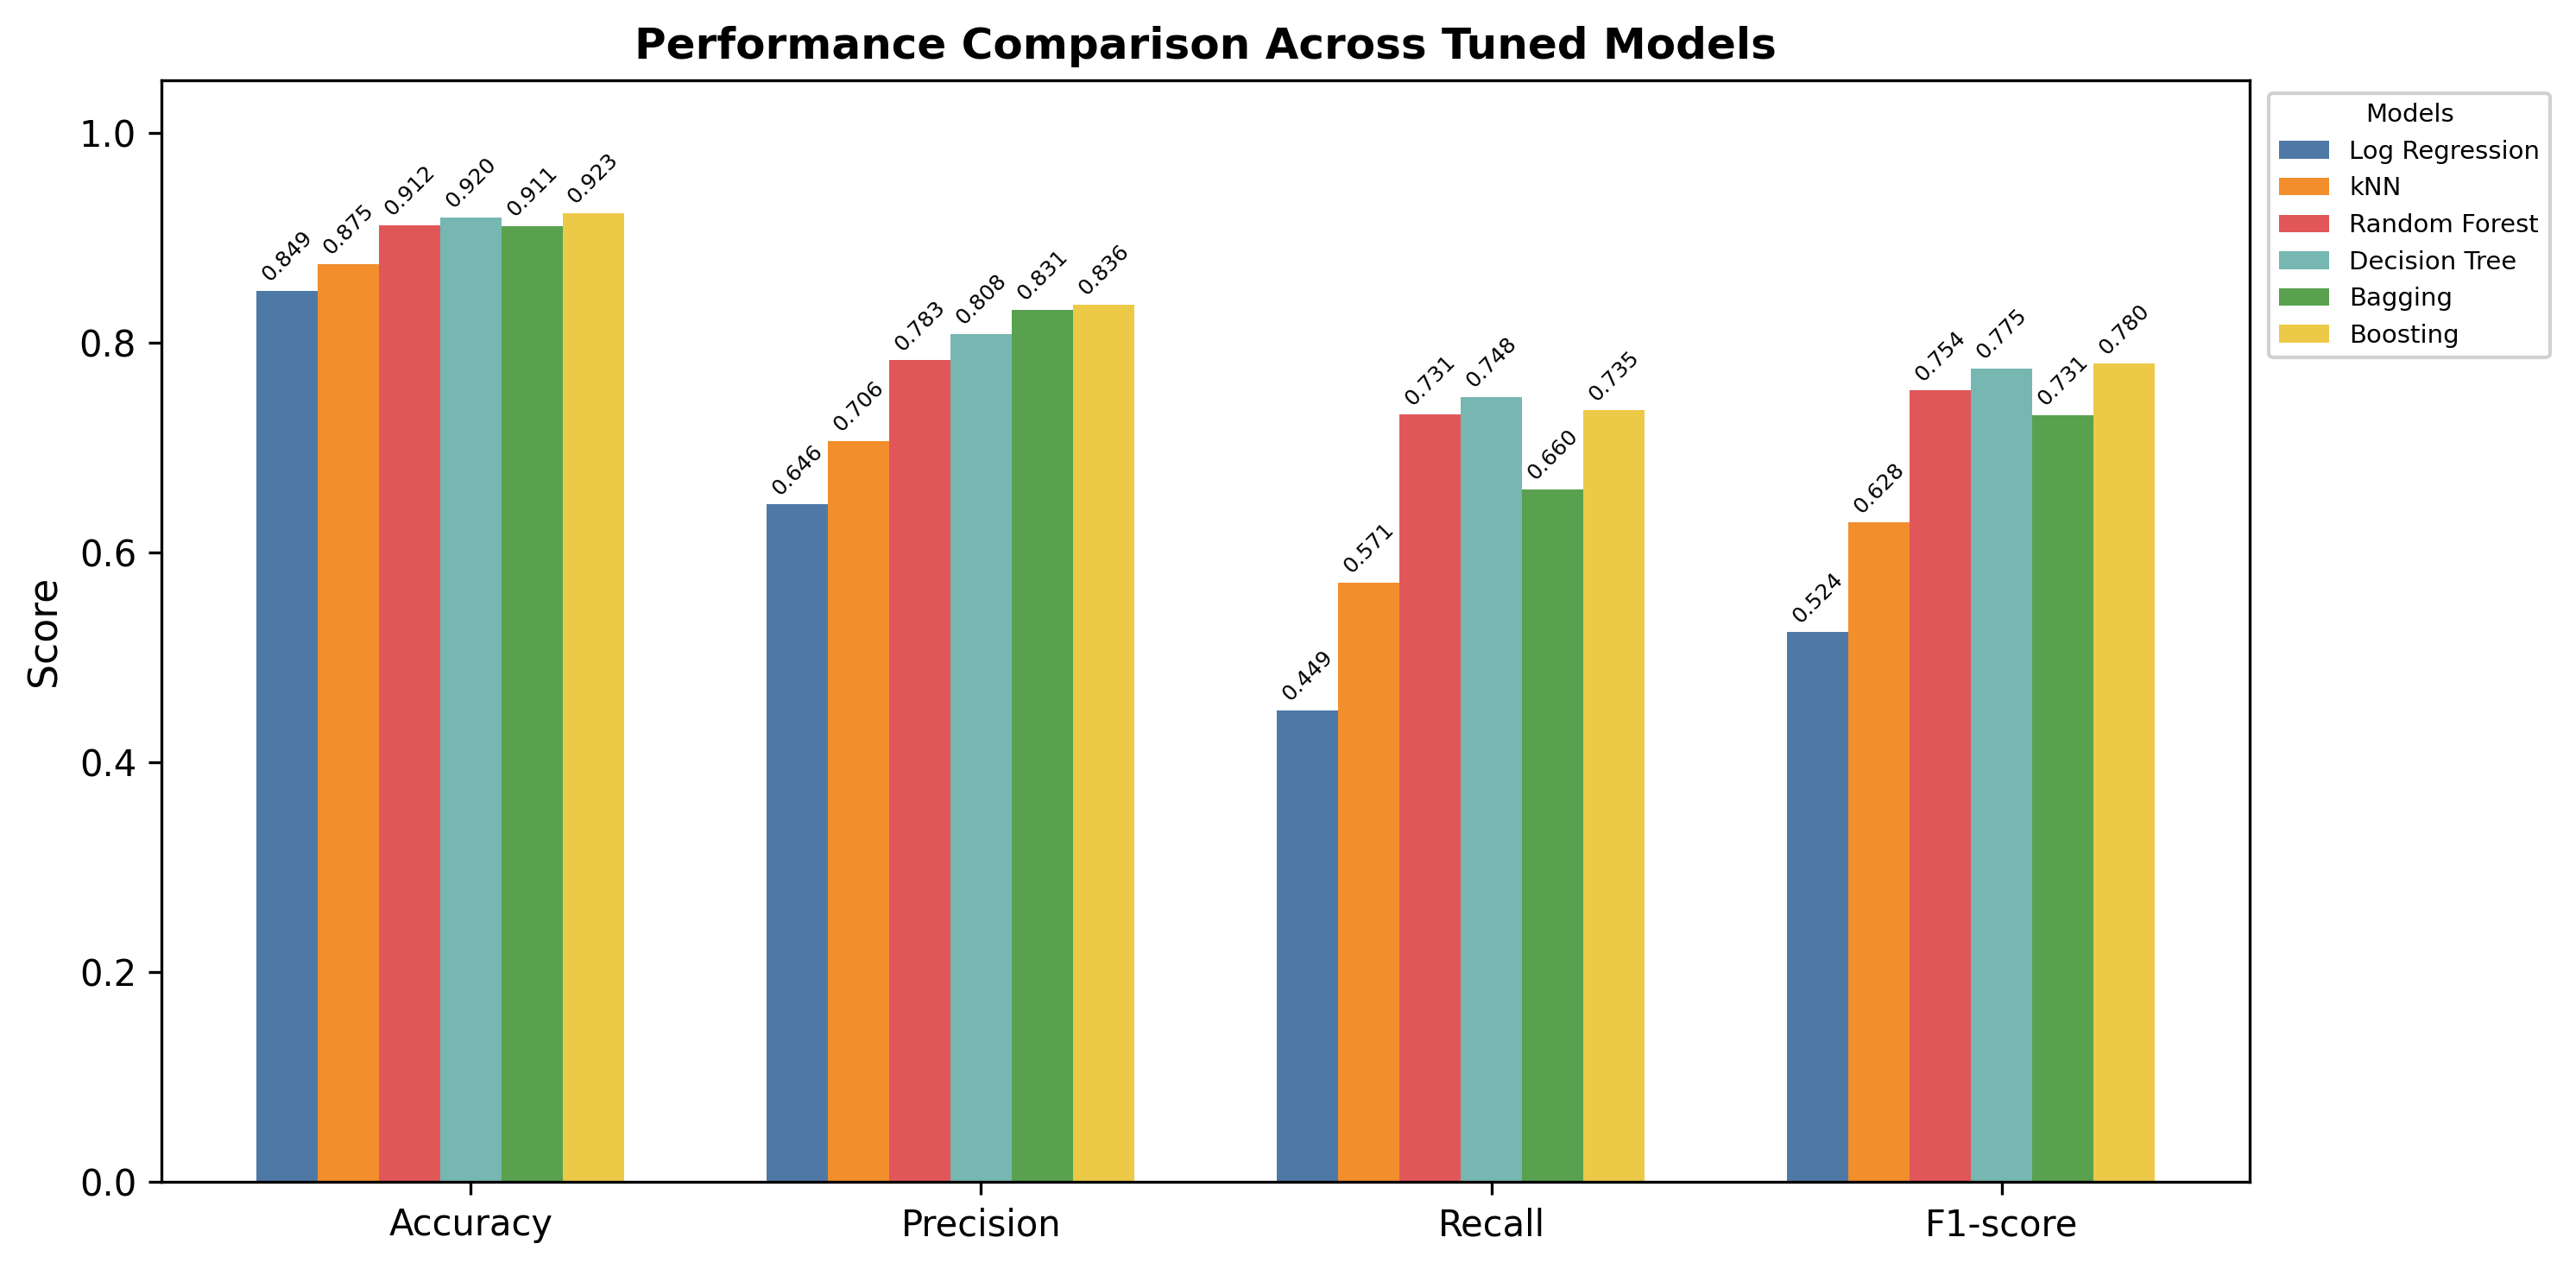

In [42]:
results_tuned = [
    log_reg_eval_tuned,
    knn_eval_tuned,
    rf_eval_tuned,
    tree_eval_tuned,
    bg_eval_tuned,
    xgb_eval_tuned
]
generate_chart(results_tuned, "Performance Comparison Across Tuned Models")